## Teoria de Mie

Como primer punto a tratar, es importante mencionar que NO se realizará la deducción de las ecuaciones ocupadas aqui y que conllevan toda una teoria electromagnética fuerte detras de ellas (la teoria de Mie), respecto la obtención de ellas y puntos de interes de ella se pueden consultar bibliografia mas especializadas como *Absorption and Scattering
of Light by Small Particles, Bohren Huffman* y tambien *LIGHT SCATTERING by small particles K.C. vande Hulst* aunque si se explicará que impacto tendrá en el programa cada una de estas variables.

La teoria de Mie es una solución a las ecuaciones de Maxwell que descibre como se dispersa una onda electromagnética al intercatuar con cuarpos de geometrías en las que las ecuaciones de Maxwell se puedan separar en sus dependencias radiales y angulares, como son geometrías esféricas o cilindricas. 

Las formulas de dispersión de Mie son mas utiles en situaciones en las que el tamaño de la partícula es comparable con la longitud de onda incidente. En el caso en que dichas partículas cuyo radio es menor al 10$\%$ de la longitud de onda incidente se ocupa la una aproximación denominada *dispersión de Rayleigh* 

Consideremos una particula de radio $r$, con un indice de refracción de la radiación electromagnética dado por $n = \sqrt{\epsilon_r\mu_r}$, donde $\epsilon_r$ es permitividad relativa del material y $\mu_r$ es la permitividad relativa. Tomando en cuenta que la mayoria de los materiales naturales (en nuestro caso el oro) no son magnéticos a frecuencias del espectro visible, se puede aproximar $\mu_r \simeq 1$ y $\therefore n \simeq \sqrt{\epsilon_r}$

Tomando en cuenta que la permitividad relativa es una cantidad compleja ($\epsilon_r = \epsilon_R + i\epsilon_R$), el índice de refracción de la partícula contemplará tambien una parte real n (*indice de refracción*) y una parte imaginaria k (*Indice de extinción*)
$$\epsilon_r = \epsilon_R + i\epsilon_R = n^2 = (n+ik)^2$$
De donde se cumple que:

$$Re \left(\epsilon_r\right) = n^2-k^2$$
$$Im \left(\epsilon_r\right) = 2nk$$

Consideremos ahora, también que dicha partícula esta sumergida en un medi con permitividad $\epsilon_m = n_m^2$ y es irradiada por una onda plana cuya frecuencia angular es:
$$\omega = \frac{2\pi c}{\lambda_0}= \frac{kc}{n_m}$$
$$\implies k = \frac{2\pi n_m }{\lambda_0}$$

Antes de pasar de lleno a las ecuaciones de la teoria de Mie, diefinamos un par de parametros utiles a ocupar en el programa:

**factor de tamaño**
$$x = kr_0$$
**Indice de refracción relativo**
$$m = \frac{n}{n_m}$$

Tomando en cuenta las condiciones anteriores, definimos la sección eficaz de extincion, espacimiento y absorción como:
$$\sigma_{ext} = \frac{2\pi}{k^2}\sum_{j=1}^{\infty}{(2j+1)Re(a_j+b_j)}$$
$$\sigma_{esp} = \frac{2\pi}{k^2}\sum_{j=1}^{\infty}{(2j+1)(|a_j|^2+|b_j|^2)}$$
$$\sigma_{abs} = \sigma_{ext}-\sigma_{esp}$$

Donde los coeficientes $a_j$ y $b_j$ se definen como:



Siendo en este caso $\psi_j(x)$ y $\xi_j(x)$ las funciones de Riccatt-Bessel de orden $j$ en el punto $x$. Sobre estas funciones se ondará un poco mas adelante.

Y los coeficientes de extincion, esparciomiento y absorción son respectivamente:
$$Q_{ext} = \frac{\sigma_{ext}}{\pi r^2} \hspace{1 cm} Q_{esp} = \frac{\sigma_{esp}}{\pi r^2} \hspace{1 cm} Q_{abs} = \frac{\sigma_{abs}}{\pi r^2}$$



Para comenzar el programa se dividira primero en 3 puntos para explicar adecuadamente su construcción:

1. Indice de refracción del oro
2. Funciones especiales y sus derivadas 
3. Modelo semi-empirico 

### Indice de refacción del oro

Como se mencionó anteriormente, al incidir una onda electromagnética sobre una partícula, una parte de esta luz se refracta, otra parte se absorbe pudiendo entonces definir el indice de refracción como $n_{au} =n+ik$ donde $n$ es el indice de refracción y $k$ el coeficiente de extinción.

Datos sobre lo mencionado anteriormente se pueden obtener directamente de https://refractiveindex.info/ donde se ven reflejadas mediciones tomadas de varios autores a diferentes materiales. En particular, para el oro usaremos los datos de *Johnson and Christy 1972: n,k 0.188–1.937 µm*, cuya base de datos se descargó y alojó en la dirección *../Desktop/Modelo mie/Jhonson.csv*.
Así que, trasladamos los datos al programa principal para poder visualizarlos y obtener el valor de n en cualquier punto mediante una iterpolación de los mismos.

In [21]:
#LIBRERIAS
from scipy.interpolate import InterpolatedUnivariateSpline     #Para interpolar
import numpy as np                                             #Funciones matematicas
import matplotlib.pyplot as plt                                #Manipulación de graficos
import pandas as pd                                            #Base de datos
import scipy as sp                                             #Funciones especiales
import math                                                    #Mas funciones

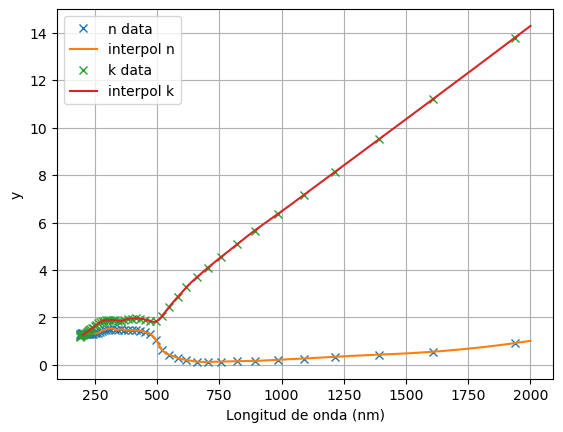

In [22]:
#Exportamos el documento de una carpeta llamada función y ubicada en el escritorio y lo guardamos en un 'data frame'
data_frame = pd.read_csv("Jhonson.csv")
#Se dividen en arreglos cada columna

x = data_frame['long_onda'] #(Ya son listas que dependen de X)
n = data_frame['n']
k = data_frame['k']
#Realizamos una interpolación de los datos para tener un contínuo

f_interp1 = InterpolatedUnivariateSpline(x, n, k=3)  #Interpolación de n
f_interp2 = InterpolatedUnivariateSpline(x, k, k=3)  #Interpolación de k

x1 = np.linspace(200,2000,2001) #Limites de la longitd de onda (x)

n_interp = lambda x1: f_interp1(x1)
k_interp = lambda x1: f_interp2(x1) 

plt.plot(x,n,'x',label = 'n data')      #Graficamos n
plt.plot(x1,n_interp(x1),label = 'interpol n')
plt.plot(x, k,'x', label = 'k data')      #Graficamos k
plt.plot(x1,k_interp(x1),label = 'interpol k')

#Caracteristicas del gráfico
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()

Debido a que nuestro interés es mas particular en el rango de los 200 a los 1000 nm, hacemos un par de modificaciones a los limites de x para definir mejor la gráfica y definimos tanto el indice de refracción como el coeficiente de extincion, lo mismo para las componentes real y compleja de la permitividad relativa.

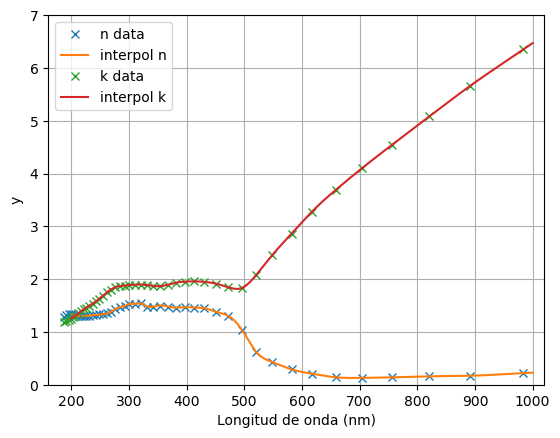

In [23]:
#Exportamos el documento de una carpeta llamada función y ubicada en el escritorio y lo guardamos en un 'data frame'
data_frame = pd.read_csv("Jhonson.csv")
#Se dividen en arreglos cada columna

x = data_frame['long_onda'] #(Ya son listas que dependen de X)
n = data_frame['n']
k = data_frame['k']
#Realizamos una interpolación de los datos para tener un contínuo

f_interp1 = InterpolatedUnivariateSpline(x, n, k=3)  #Interpolación de n
f_interp2 = InterpolatedUnivariateSpline(x, k, k=3)  #Interpolación de k


x1 = np.linspace(200,1000,1600) #Limites de la longitd de onda (x)

n_interp = lambda x1: f_interp1(x1)
k_interp = lambda x1: f_interp2(x1) 

plt.plot(x,n,'x',label = 'n data')      #Graficamos n
plt.plot(x1,n_interp(x1),label = 'interpol n')
plt.plot(x, k,'x', label = 'k data')      #Graficamos k
plt.plot(x1,k_interp(x1),label = 'interpol k')

#Caracteristicas del gráfico
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()

plt.legend()
v = [160,1020,0,7]
plt.axis(v)

##Definimos el indice de refracicón complejo para el oro

n_Au = lambda x1: n_interp(x1)+1j*k_interp(x1)

"""Ahora que contamos con el indice de refracción y extincion del oro
podemos escribir su función dielectrica:"""

E_real = lambda x1: (n_interp(x1)**2-(k_interp(x1)**2))
E_complejo = lambda x1: 2*n_interp(x1)*k_interp(x1)
E_Au = lambda x1:  E_real(x1)+1j*E_complejo(x1)


Entonces, hasta ahora ya contamos con las variables $n_{au}$ y $\epsilon_{au}$ como funciones que dependen de una longitud de onda dada, pudiendolas obtener en cualquier momento como se muestra a continuación

In [6]:
for i in range (200,210):
    print(n_Au(i),E_Au(i))

(1.3299814226603268+1.2555441279978055j) (0.19245952727181725+3.3397007311346814j)
(1.331186297628537+1.2621309976855872j) (0.17908230367515587+3.3602629798625765j)
(1.3321581024203992+1.2687043453476303j) (0.16503449394035963+3.3802295464616283j)
(1.3310281786375069+1.2751246259065208j) (0.1456932007338343+3.394453616712377j)
(1.3261556185517+1.281286334951445j) (0.11699405248293582+3.3983701441387484j)
(1.3182507247069681+1.2874353908133689j) (0.08029508767167481+3.3943252739062446j)
(1.3094108875486046+1.294025032384565j) (0.04005608799294991+3.38882093232957j)
(1.301751425417228+1.3015111781433055j) (0.0006254267438097205+3.3884880626890075j)
(1.2972057918302926+1.3102922723111696j) (-0.03412297252031182+3.3994374492650485j)
(1.2958299378596914+1.3201734170020163j) (-0.06368262310532802+3.4214404738354784j)


## Funciones especiales y sus derivadas

Vamos a comenzar con las **Funciones de Bessel esfericas ($j_n$, $y_n$)**, estas funciones son soluciones linealmente independientes de la ecuación diferencial:

$$x^2\frac{d^2y}{dx^2}+2x\frac{dy}{dx}+\left[x^2-n(n+1)\right]y = 0$$

Donde n es un entero positivo y estan relacionadas con las funciones de Bessel ordinarias ($J_n$, $Y_n$) de la siguiente manera:

$$ j_n(x)=\sqrt{\frac{\pi}{2x}}J_{n+\frac{1}{2}}(x)$$ 
$$y_n(x) = \sqrt{\frac{\pi}{2x}}Y_{n+\frac{1}{2}}(x)$$

Ambas funciones se encuentran dentro de la libreria *scipy* veamos sus gráficas en elrango de x que nos interesa

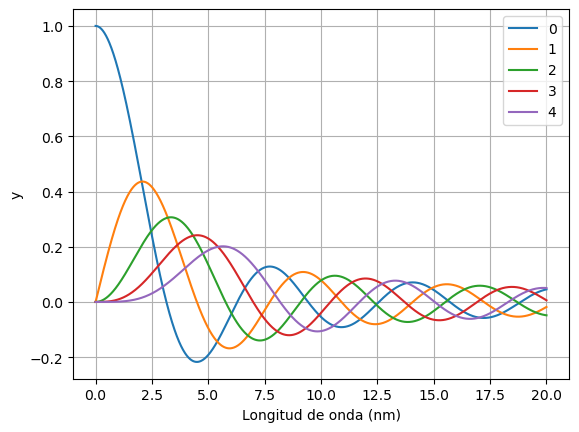

In [7]:
x1 = np.linspace(0,20,1600) #Limites de la longitd de onda (x)

for i in range (0,5):
    Bessel_sp = lambda i,x1: sp.special.spherical_jn(i,x1,derivative = False)   #Funcion esferica de  Bessel
    plt.plot(x1,Bessel_sp(i,x1),label = i)


plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()

La anterior gráfica muestra las funiones de Bessel esfericas de primera clase ($j_n(x)$) del grado 0 al 4 en el intervalo 0,10.

La siguiente grafica mostrará las funciones de Bessel esfericas de segunda clase ($y_n(x)$) del grado 0 al 4 en el intervalo 5,10. Una observación importante es que en 0 esta funcion divegre al $-\infty$ por eso el rango empieza despues (es una correción meramente visual)

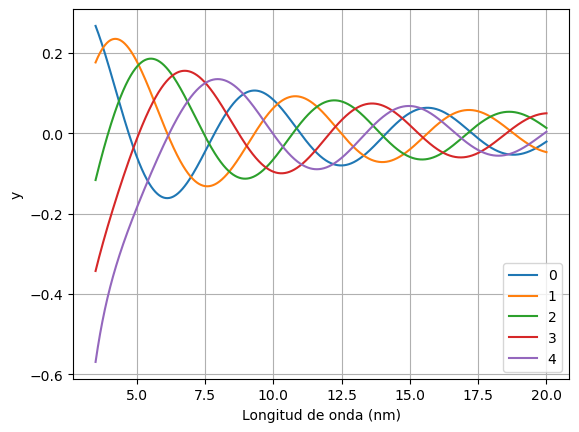

In [8]:
x1 = np.linspace(3.5,20,1600) #Limites de la longitd de onda (x)

for i in range (0,5):
    Bessel_nw = lambda i,x1: sp.special.spherical_yn(i,x1,derivative = False)      #Funciones de Neumman esfericasl
    plt.plot(x1,Bessel_nw(i,x1),label = i)


plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()

Y finalmente una comparación entre ambas para el orden 0 y 1

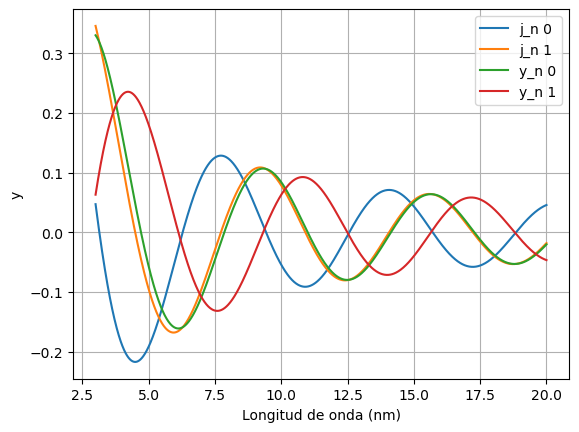

In [9]:
x1 = np.linspace(3,20,1600) #Limites de la longitd de onda (x)

for i in range (0,2):
    Bessel_sp = lambda i,x1: sp.special.spherical_jn(i,x1,derivative = False)   #Funcion esferica de  Bessel
    plt.plot(x1,Bessel_sp(i,x1),label ='j_n '+ str(i))
    
for i in range (0,2):
    Bessel_nw = lambda i,x1: sp.special.spherical_yn(i,x1,derivative = False)      #Funciones de Neumman esfericasl
    plt.plot(x1,Bessel_nw(i,x1),label = 'y_n ' + str(i))


plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()


Otro tipo de funciones a tomar en cuenta, serán las **Funciones de Hankel esfericas de primer y segundo tipo** las cuales se escriben en función de las funciones de bessel esfericas de la siguiente manera respectivamente:

$$h^{(1)}_n(x) = j_n(x)+iy_n(x)$$
$$h^{(2)}_n(x) = j_n(x)-iy_n(x)$$

Estas funciones también se encuentran dentro de la libreria *scipy*, no obstante no se pueden graficar ya que cuentan con una componente real y una imaginaria,y, ambas ya fueron graficadas previamente.

Ahora ya podemos hablar de las funciones especiales que se encuentran dentro de nuestra definicion de coeficientes $a_j$ y $b_j$ (en adelante coeficientes de Mie) que son las denominadas **Funciones de Riccati-Bessel**. Estas funciones son soluciones de la ecuacion de Bessel original en la que el término $2d\frac{dy}{dx} = 0$. Es decir, son soluciones de la siguiene ecuación diferencial:

$$x^2\frac{d^2y}{dx^2}+ \left[ x^2-n(n+1)\right]y = 0$$

Y aunque son un conunto de 4 soluciones linealmente independientes, solo nos interesan 2, cuya relacion con las funciones de Bessel y de Hankel son respectivamente las siguientes:

$$\psi_n(x) = xj_n(x)$$
$$\xi_n(x) = xh^{(1)}_n(x)$$

Y cuyas derivadas pueden escribirse como:

$$\psi_n´(x) = \psi_{n-1}(x)-\frac{n}{x}\psi_n(x)$$

$$\xi_n´(x) = \xi_{n-1}(x)-\frac{n}{x}\xi_n(x)$$

Aunque no es posble graficar las funciones $\xi(x)$ y $\xi´(x)$ por tener contenidos factores complejos, las funciones $\psi(x)$ y si derivada constan unicamente de valores reales, por lo que sus graficas se muestran a continuación.
Dos acalaraciones importantes sobre $\psi´(x)$ son:
1. No esta definida en $x = 0$ por el término $\frac{n}{x}$
2. No esta definida para $n = 0$ por el término $\psi_{n-1}(x)$

Text(0.5, 1.0, 'Comparación')

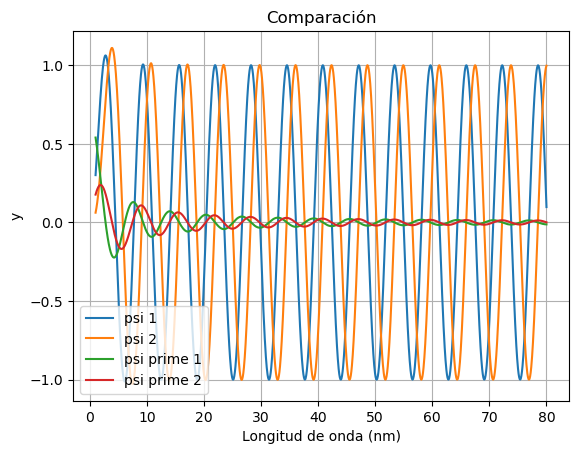

In [10]:
x1 = np.linspace(1,80,1600) #Limites de la longitd de onda (x)

for i in range (1,3):
    phi = lambda l, x1: x1*sp.special.spherical_jn(l,x1,derivative = False)   #Riccati 1
    plt.plot(x1,phi(i,x1),label ='psi '+ str(i))
    
for i in range (1,3):
    phiprime = lambda l,x1: (Bessel_sp(l-1,x1))-((l/x1)*Bessel_sp(l,x1))
    plt.plot(x1,phiprime(i,x1),label = 'psi prime ' + str(i))


plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Comparación")

Text(0.5, 1.0, 'psi')

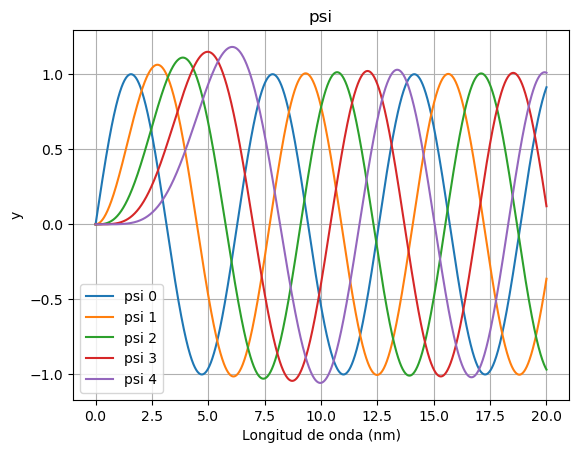

In [11]:
x1 = np.linspace(0,20,1600) #Limites de la longitd de onda (x)

for i in range (0,5):
    phi = lambda l, x1: x1*sp.special.spherical_jn(l,x1,derivative = False)   #Riccati 1
    plt.plot(x1,phi(i,x1),label ='psi '+ str(i))

plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("psi")

Text(0.5, 1.0, 'psi prime')

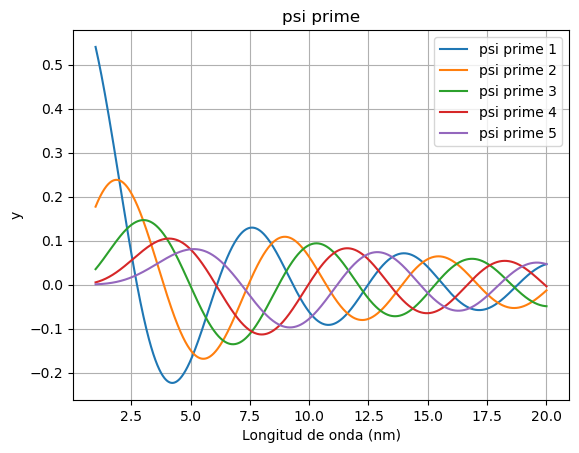

In [12]:
x1 = np.linspace(1,20,1600) #Limites de la longitd de onda (x)
for i in range (1,6):
    phiprime = lambda l,x1: (Bessel_sp(l-1,x1))-((l/x1)*Bessel_sp(l,x1))
    plt.plot(x1,phiprime(i,x1),label = 'psi prime ' + str(i))


plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("psi prime")

### Coeficientes de Mie

Como los coeficientes de Mie se conforman por una parte real y una compleja no los podemos obtener graficamente, no obstante ya podemos definirlos con las funciones que tenemos hasta ahora, solo hay que recordar que:

$$a_j = \frac{m\psi_j(mx)\psi_j´(x)-\psi_j(x)\psi_j´(mx)}{m\psi_j(mx)\xi_j´(x)-\xi_j(x)\psi_j´(mx)}$$

$$b_j = \frac{\psi_j(mx)\psi_j´(x)-m\psi_j(x)\psi_j´(mx)}{\psi_j(mx)\xi_j´(x)-m\xi_j(x)\psi_j´(mx)}$$

Y primero definimos nuestras variables.

In [13]:
n_a= 1.3325 
r = 40    #en nanometros

Bessel_sp = lambda l,x1: sp.special.spherical_jn(l,x1,derivative = False)   #Funcion esferica de  Bessel
Bessel_nw = lambda l,x1: sp.special.spherical_yn(l,x1,derivative = False)      #Funciones de Neumman esfericas
Hankel1 = lambda l,x1: sp.special.hankel1(l,x1,out = None)    #Funcion de Hankel esferica de primer tipo
Hankel2 = lambda l,x1: sp.special.hankel2(l,x1,out = None)     #Funcion Hankel esferica de segundo tipo

phi = lambda l, x1: x1*sp.special.spherical_jn(l,x1,derivative = False)   #Riccati 1
xi = lambda l, x1: x1*sp.special.hankel1(l,x1,out = None)                #Riccati2
phiprime = lambda l,x1: (phi((l-1),x1))-((l/x1)*phi(l,x1))
xiprime = lambda l,x1: (xi((l-1),x1))-((l/x1)*xi(l,x1))

m = lambda x1: n_Au(x1)/n_a  #Coeficiente de difracción relativo
t = lambda x1: 2*np.pi*n_a*r/x1   #Factor de tamaño
w = lambda x1: m(x1)*t(x1)     #Otro factor


Ahora solo dfinimos los coeficientes como funcion que que dependan del orden del coeficiente (funciónes de bessel) y del punto donde se evaluan

In [14]:
    a = lambda l,x1: (((m(x1)*phi(l,w(x1))*phiprime(l, t(x1)))-(phi(l,t(x1))*phiprime(l, w(x1))))/
                      ((m(x1)*phi(l,w(x1))*xiprime(l,t(x1)))-(xi(l,t(x1))*phiprime(l,w(x1)))))
    b = lambda l,x1: (((phi(l,w(x1))*phiprime(l, t(x1)))-(m(x1)*phi(l,t(x1))*phiprime(l, w(x1))))/
                      ((phi(l,w(x1))*xiprime(l,t(x1)))-(m(x1)*xi(l,t(x1))*phiprime(l,w(x1)))))

Guardando en una lista los valores de la parte compleja e imaginaria de cada coeficiente, podemos visualizar gráficamente sus valores, como se muestra a continucaión

Text(0.5, 1.0, 'a,b orden 1')

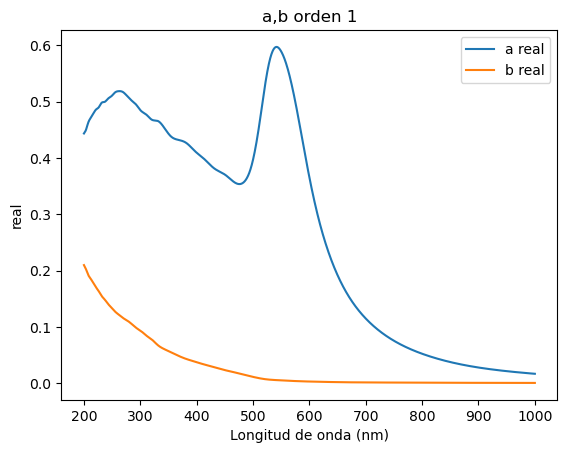

In [15]:
x1 = np.linspace(200,1000,2000) #Limites de la longitd de onda (x)
plt.plot(x1,a(1,x1).real,label = 'a real')
plt.plot(x1,b(1,x1).real,label = 'b real')

#Caracteristicas del gráfico
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("real")
plt.legend()
plt.title("a,b orden 1")

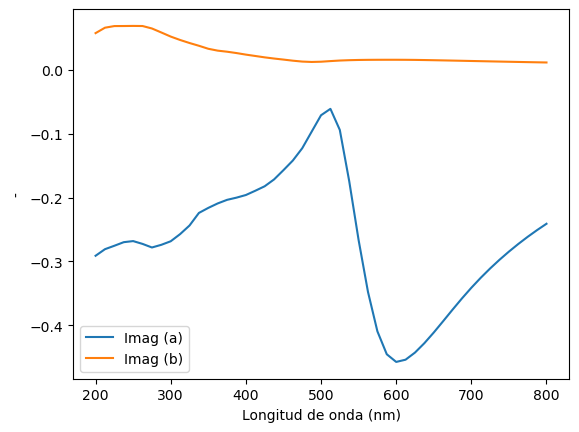

In [16]:
x1 = np.linspace(200,800,49) #Limites de la longitd de onda (x)
plt.plot(x1,a(1,x1).imag,label = 'Imag (a)') 
plt.plot(x1,b(1,x1).imag,label = 'Imag (b)') 


#Caracteristicas del gráfico
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("-")
plt.legend()

Algo que seria importate mencionara en caso de futuras aproximaciones para la optimización del programa final, es que conforme el orden d los coficientes de Mie aumenta, estos convrgen a valores cercanos a cero, por lo que en la formula de extinción a la hora de sumar dichos coeficientes en un numero N, el cambio no es significativo.

Tomemos por ejemplo, la parte real de los coeficientes de Mie, en el orden 1ha llegado a una intensidad aproximada de 7 y 4 para los coeficientes a y b de orden 1 respectivamente. Para cuando llegamos al orden 4 estos valores se reducen a la mitad, a parte de que el ancho del pico disminuye considerablemente (observación cualitativa):

Text(0.5, 1.0, 'a,b orden 4')

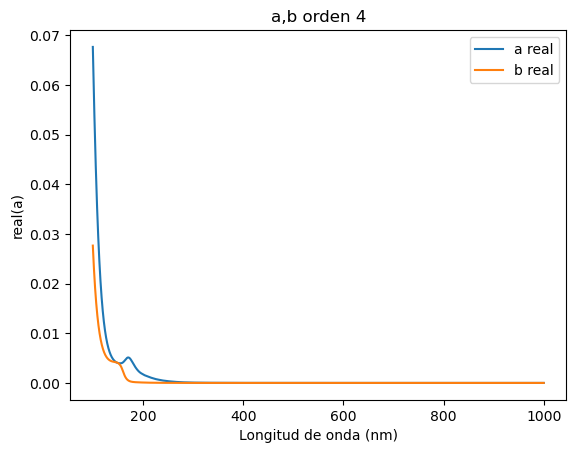

In [41]:

x1 = np.linspace(100,1000,2000) #Limites de la longitd de onda (x)
plt.plot(x1,a(4,x1).real,label = 'a real')
plt.plot(x1,b(4,x1).real,label = 'b real')

#Caracteristicas del gráfico
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("real(a)")
plt.legend()
plt.title("a,b orden 4")

Finalmente cuando llegamos al orden, estos picos ya dejan de tener valores significativos para la suma, salvo en longitudes cercanas al cero

Text(0.5, 1.0, 'a,b orden 12')

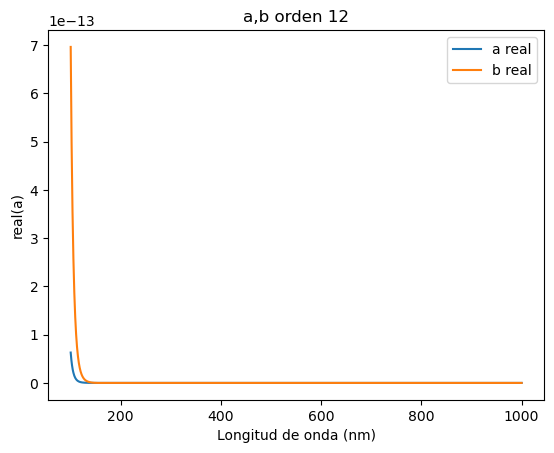

In [42]:
x1 = np.linspace(100,1000,2000) #Limites de la longitd de onda (x)
plt.plot(x1,a(12,x1).real,label = 'a real')
plt.plot(x1,b(12,x1).real,label = 'b real')

#Caracteristicas del gráfico
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("real(a)")
plt.legend()
plt.title("a,b orden 12")

Y finalmente, los coeficientes de absorción y extinción los obtenemos como se menciono anteriormente
$$\sigma_{ext} = \frac{2\pi}{k^2}\sum_{j=1}^{\infty}{(2j+1)Re(a_j+b_j)}$$
$$\sigma_{esp} = \frac{2\pi}{k^2}\sum_{j=1}^{\infty}{(2j+1)(|a_j|^2+|b_j|^2)}$$
$$\sigma_{abs} = \sigma_{ext}-\sigma_{esp}$$
En particular nos interesa el coeficiente de extinción para el ajuste semi-empirico, por lo que nose quedamos con ese.

Se observa que en la ecuaión hay una suma desde el primer indice de los coeficientes de Mie hasta el infinitesimo coeficiente; computacionalmente *W. J. Wiscombe* nos ofrece una aproximación a ´infinito´ de un término muy pequeño a partir del cual el resultado no varía y esta aproximación se dá en función del parametro de tamaño (al que en el programa nombramos como *t*)

$$t = \frac{2\pi n_m r}{\lambda_0}$$

Teniendo en cuenta que una hipotesis de la teoria de Mie consiste en que el radio de la particula sea comparable al de la longitud de onda, y, que por otra parte el indice de refracción del medio (agua) es de 1.333 tenemos unfactor de tamaño cercano a 8 cumpliendo con la siguiente condición expuesta en *Improved Mie scattering algorithms*

$$8<t<4200 \hspace{1cm} N = t+4.05t^{\frac{1}{3}}+2 $$

Donde se tomara a t como el máximo parametro de tamaño del espectro para un radio dado, es decir que a radio constante el mayor parametro de tamaño se dá a la menor longitud de onda recibida, en nuestro caso a $\lambda = 206.6$

Maximo N se dá en particulas con mayor radio, que con base en los resultados TEM hasta el momento son de 80 nm, no obstante supondremos 100 nm.


$$\implies t_{max} = \frac{2\pi n_m 100}{206.6} = 4.05 $$

$$N_{max} = 28 $$


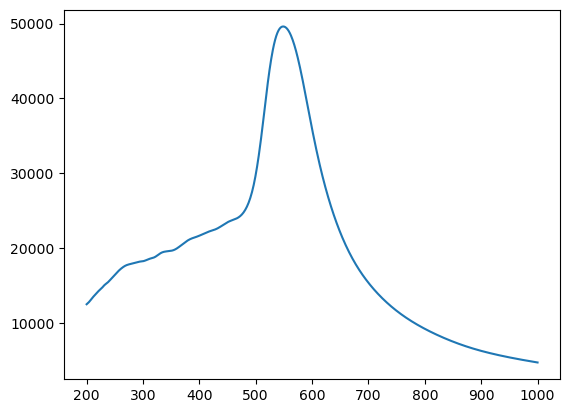

In [43]:
N = math.ceil(t(206.6)+4*np.cbrt(t(206.6))+2)   #Redondear entero hacia arriba
k = lambda x1: 2*np.pi*n_a/x1   #Factor de tamaño

def sigma_ext (x1):
    fsuma = 0
    for i in range (1,N):
        fsuma = fsuma + (((2*i)+1)*((a(i,x1)+b(i,x1)).real))        
    sigma = (2*np.pi/(k(x1))**2)*fsuma #factor suma
    return sigma
x2=np.linspace(200,1000,800)
plt.plot(x2,sigma_ext(x2))

#### Nota importante: no modificar el dominio del indice de difracción del oro

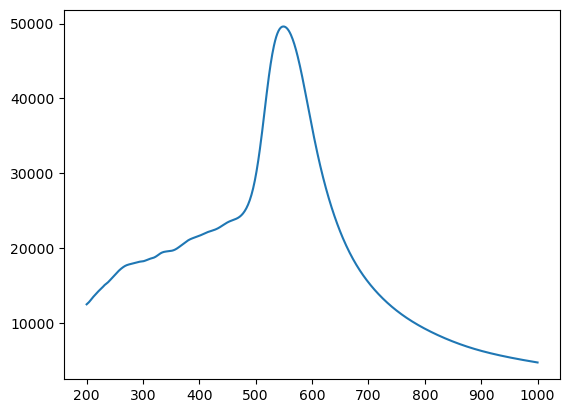

In [44]:
x2=np.linspace(200,1000,800)
lista =[]

for i in range (200,1000):
    lista.insert(i,sigma_ext(i))
    
y = lista
plt.plot(x2,y)

### Modelo semi-empírico

El modelo que se ocupara para obtener computacionalmente los espectros de absorcion de las particulas de oro en agua,es tomado de *Determination of Size and Concentration of Gold
Nanoparticles from UV-Vis Spectra* de *Wolfgang Haiss* donde se da la absorbancia en funión del coeficiente de extinción y el radio de la partícula mediante la relación:

$$A=\frac{\pi R^2 Q_{ext}d_0 N}{2.303}$$

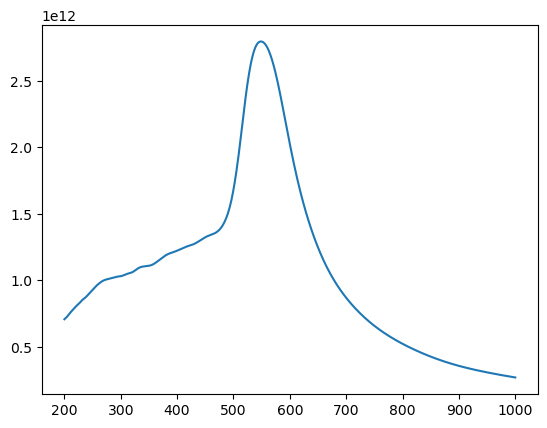

In [45]:
do = 1e7
concentracion = 5.07e-6
Abs = lambda x2: (np.pi*r**2*(sigma_ext(x2)/np.pi*r**2)*do*concentracion)/2.303
plt.plot(x2,Abs(x2))


Lo anterior nos dá una visualización de la absorción que debería marcar nuestro coloide a **radio constante**. Aunque es posible normalizar en un rango de instensidades especifico, de momento nos quedaremos con el programa como está.
A cntinuaci´pn se muestra e código limpio, para copiar y pegar en el entorno que se desee. como puede ser *spyder*

Text(0.5, 1.0, 'Absroción')

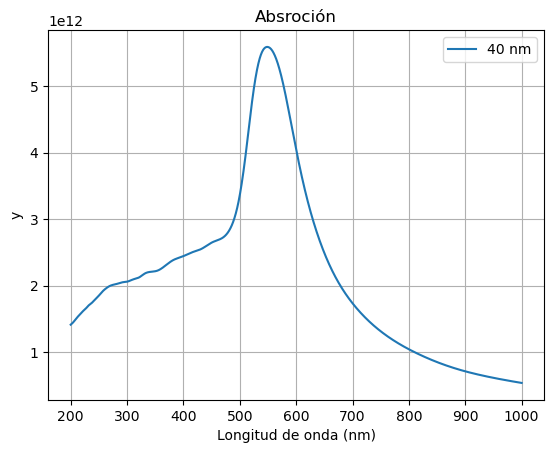

In [46]:
from scipy.interpolate import InterpolatedUnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import math
"""Se empiez con la obtencion de datos de la función dielectrica del oro
para lo cuál se exportan los datos del documento de Jhonson sobre el 
indicede refracción n y el coeficiente de extinción k de forma que
epsilon(x) {x-->Longitud de onda 'labda'} es iguala n(x)+ik(x)"""
#Exportamos el documento de una carpeta llamada función y ubicada en el escritorio
# y lo guardamos en un 'data frame'
data_frame = pd.read_csv("Jhonson.csv")

#Se dividen en arreglos cada columna
x = data_frame['long_onda']                    #(Ya son listas que dependen de X)
n = data_frame['n']
k = data_frame['k']

#Realizamos una interpolación de los datos para tener un contínuo
f_interp1 = InterpolatedUnivariateSpline(x, n, k=3)  #Interpolación de n
f_interp2 = InterpolatedUnivariateSpline(x, k, k=3)  #Interpolación de k

#Opcional--Grafícar dichas interpolaciónas para revisar que sean adecuadas
n_interp = lambda x1: f_interp1(x1)
k_interp = lambda x1: f_interp2(x1) 

##Definimos el indice de refracicón complejo para el oro
n_Au = lambda x1: n_interp(x1)+1j*k_interp(x1)

"""Ahora que contamos con el indice de refracción y extincion del oro
podemos escribir su función dielectrica:"""
E_real = lambda x1: (n_interp(x1))**2+(k_interp(x1))**2
E_complejo = lambda x1 :2*n_interp(x1)*k_interp(x1)
E_Au = lambda x1:  E_real(x1)+1j*E_complejo(x1)
x2 = np.linspace(200,2000,800)

"""Definimos el resto de variables a ocupar a continuación"""
r = 40                    #en nanometros
n_a= 1.3325               #Indice de refracción del agua
E_a = np.sqrt(n_a)        #Constante dielectrica (pagina de indices de refraccion)

Bessel_sp = lambda l,x1: sp.special.spherical_jn(l,x1,derivative = False)   #Funcion esferica de  Bessel
Bessel_nw = lambda l,x1: sp.special.spherical_yn(l,x1,derivative = False)   #Funciones de Neumman esfericas
Hankel1 = lambda l,x1: sp.special.hankel1(l,x1,out = None)    #Funcion de Hankel esferica de primer tipo
Hankel2 = lambda l,x1: sp.special.hankel2(l,x1,out = None)    #Funcion Hankel esferica de segundo tipo

phi = lambda l, x1: x1*sp.special.spherical_jn(l,x1,derivative = False)  #Riccati1
xi = lambda l, x1: x1*sp.special.hankel1(l,x1,out = None)                #Riccati2
phiprime = lambda l,x1: (phi((l-1),x1))-((l/x1)*phi(l,x1))
xiprime = lambda l,x1: (xi((l-1),x1))-((l/x1)*xi(l,x1))

m = lambda x1: n_Au(x1)/n_a                     #Coeficiente de difracción relativo
t = lambda x1: 2*np.pi*n_a*r/x1                 #Factor de tamaño por el radio
w = lambda x1: m(x1)*t(x1)                      #Otro factor
N = math.ceil(t(206.6)+4*np.cbrt(t(206.6))+2)   #Limite de sumaRedondear entero hacia arriba
k = lambda x1: 2*np.pi*n_a/x1   #Factor de tamaño

def aj (l,x1):
    a = (((m(x1)*phi(l,w(x1))*phiprime(l, t(x1)))-(phi(l,t(x1))*phiprime(l, w(x1))))/
        ((m(x1)*phi(l,w(x1))*xiprime(l,t(x1)))-(xi(l,t(x1))*phiprime(l,w(x1)))))
    return a

def bj (l,x1):
    b = (((phi(l,w(x1))*phiprime(l, t(x1)))-(m(x1)*phi(l,t(x1))*phiprime(l, w(x1))))/
        ((phi(l,w(x1))*xiprime(l,t(x1)))-(m(x1)*xi(l,t(x1))*phiprime(l,w(x1)))))
    return b

#Sección eficaz
def sigma_ext(x1):
    fsuma = 0
    for i in range (1,N):
        fsuma = fsuma + (((2*i)+1)*((aj(i,x1).real)+(bj(i,x1).real))) 
    sigma = (x1**2/(np.pi*n_a**2))*fsuma #factor suma
    return sigma

do = 1e7                      #Ancho de la cubeta
concentracion = 5.07e-6       #Concentración
Abs = lambda x2: (np.pi*r**2*(sigma_ext(x2)/np.pi*r**2)*do*concentracion)/2.303

x2 = np.linspace(200,1000,2000)
plt.plot(x2,Abs(x2),label = str(r) + " nm")

plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Absroción")

Con algunas modificacciones el codigo se puede hacer dependiente tambien del radio. de esta forma, modificando el radio se pueden realizar las comparaciones entre éstos

(300.0, 1000.0, 0.0, 6000000000.0)

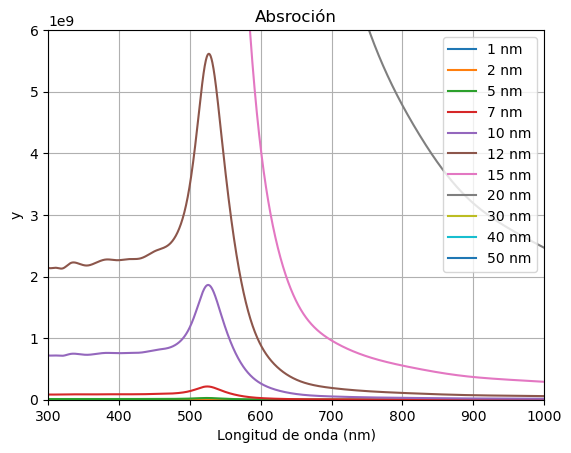

In [47]:
from scipy.interpolate import InterpolatedUnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import math
"""Se empiez con la obtencion de datos de la función dielectrica del oro
para lo cuál se exportan los datos del documento de Jhonson sobre el 
indicede refracción n y el coeficiente de extinción k de forma que 
epsilon(x) {x-->Longitud de onda 'labda'} es iguala n(x)+ik(x)"""
#Exportamos el documento de una carpeta llamada función y ubicada en el escritorio
# y lo guardamos en un 'data frame'
data_frame = pd.read_csv("Jhonson.csv")

#Se dividen en arreglos cada columna
x = data_frame['long_onda']                    #(Ya son listas que dependen de X)
n = data_frame['n']
k = data_frame['k']

#Realizamos una interpolación de los datos para tener un contínuo
f_interp1 = InterpolatedUnivariateSpline(x, n, k=3)  #Interpolación de n
f_interp2 = InterpolatedUnivariateSpline(x, k, k=3)  #Interpolación de k

#Opcional--Grafícar dichas interpolaciónas para revisar que sean adecuadas
n_interp = lambda x1: f_interp1(x1)
k_interp = lambda x1: f_interp2(x1) 

##Definimos el indice de refracicón complejo para el oro
n_Au = lambda x1: n_interp(x1)+1j*k_interp(x1)

"""Ahora que contamos con el indice de refracción y extincion del oro
podemos escribir su función dielectrica:"""
E_real = lambda x1: (n_interp(x1))**2+(k_interp(x1))**2
E_complejo = lambda x1 :2*n_interp(x1)*k_interp(x1)
E_Au = lambda x1:  E_real(x1)+1j*E_complejo(x1)
x2 = np.linspace(200,2000,800)

"""Definimos el resto de variables a ocupar a continuación"""
#r = 40                    #en nanometros
n_a= 1.3325               #Indice de refracción del agua
E_a = np.sqrt(n_a)        #Constante dielectrica (pagina de indices de refraccion)

Bessel_sp = lambda l,x1: sp.special.spherical_jn(l,x1,derivative = False)   #Funcion esferica de  Bessel
Bessel_nw = lambda l,x1: sp.special.spherical_yn(l,x1,derivative = False)   #Funciones de Neumman esfericas
Hankel1 = lambda l,x1: sp.special.hankel1(l,x1,out = None)    #Funcion de Hankel esferica de primer tipo
Hankel2 = lambda l,x1: sp.special.hankel2(l,x1,out = None)    #Funcion Hankel esferica de segundo tipo

phi = lambda l, x1: x1*sp.special.spherical_jn(l,x1,derivative = False)  #Riccati1
xi = lambda l, x1: x1*sp.special.hankel1(l,x1,out = None)                #Riccati2
phiprime = lambda l,x1: (phi((l-1),x1))-((l/x1)*phi(l,x1))
xiprime = lambda l,x1: (xi((l-1),x1))-((l/x1)*xi(l,x1))

m = lambda x1: n_Au(x1)/n_a                     #Coeficiente de difracción relativo
t = lambda r,x1: 2*np.pi*n_a*r/x1                 #Factor de tamaño por el radio
w = lambda r,x1: m(x1)*t(r,x1)                      #Otro factor
N = lambda r: math.ceil(t(r,206.6)+4*np.cbrt(t(r,206.6))+2)   #Limite de sumaRedondear entero hacia arriba
k = lambda x1: 2*np.pi*n_a/x1   #Factor de tamaño

def aj (r,l,x1):
    a = (((m(x1)*phi(l,w(r,x1))*phiprime(l, t(r,x1)))-(phi(l,t(r,x1))*phiprime(l, w(r,x1))))/
        ((m(x1)*phi(l,w(r,x1))*xiprime(l,t(r,x1)))-(xi(l,t(r,x1))*phiprime(l,w(r,x1)))))
    return a

def bj (r,l,x1):
    b = (((phi(l,w(r,x1))*phiprime(l, t(r,x1)))-(m(x1)*phi(l,t(r,x1))*phiprime(l, w(r,x1))))/
        ((phi(l,w(r,x1))*xiprime(l,t(r,x1)))-(m(x1)*xi(l,t(r,x1))*phiprime(l,w(r,x1)))))
    return b

#Sección eficaz
def sigma_ext(r,x1):
    fsuma = 0
    for i in range (1,N(r)):
        fsuma = fsuma + (((2*i)+1)*((aj(r,i,x1).real)+(bj(r,i,x1).real))) 
    sigma = (x1**2/(np.pi*n_a**2))*fsuma #factor suma
    return sigma

do = 1e7                      #Ancho de la cubeta
concentracion = 5.07e-6       #Concentración
Abs = lambda r, x2: (np.pi*r**2*(sigma_ext(r,x2)/np.pi*r**2)*do*concentracion)/2.303

x2 = np.linspace(200,1000,2000)

lista = [1,2,5,7,10,12,15,20,30,40,50]

for i in lista:
    plt.plot(x2,Abs(i,x2),label = str(i) + " nm")



plt.xlabel("Longitud de onda (nm)")
plt.ylabel("y")
plt.legend(loc = 1)
plt.grid()
plt.title("Absroción")
v = [300,1000,0,6e9]
plt.axis(v)

##### Importante!!!
El codigo anterior ocupa funciones para gráficar un conjunto de curvas en función del radio de las partículas.

Se puede limpiar el codigo midificando las funciones a tuplas.


# Codigo limpio


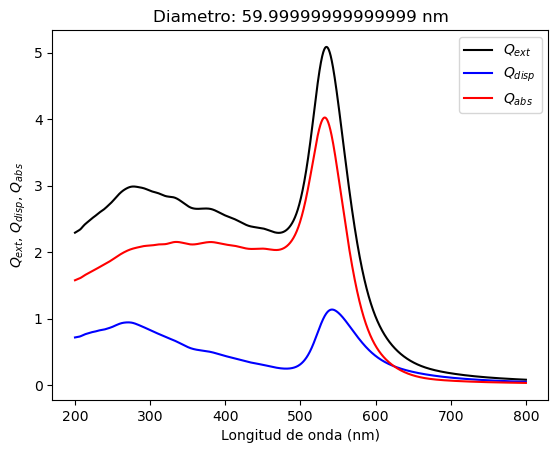

In [24]:
import numpy as np
import scipy.special as spl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
import math

data_frame = pd.read_csv("Jhonson.csv")
#Se dividen en arreglos cada columna
x = data_frame['long_onda']                    #(Ya son listas que dependen de X)
n = data_frame['n']
k = data_frame['k']

f_n = InterpolatedUnivariateSpline(x, n, k=3)  #Interpolación de n
f_k = InterpolatedUnivariateSpline(x, k, k=3)  #Interpolación de k


lam = np.linspace(200, 800, 2500)      ##Lambda: inicio, fin, intervalo 
num_lam = 2500                        ##Entradas/puntos
n_Au = f_n(lam) + 1j*f_k(lam) 
n_m = 1.333                           #indice del agua 

a = 30e-9                           #Radio de la particula   
              
##Obtención de los coeficientes de Mie##
def mie_coeff(n,x,z):
    #Funciones de Bessel y Hankel
    jnx = spl.spherical_jn(n,x)
    jnx_1 = spl.spherical_jn(n-1,x)
    ynx = spl.spherical_yn(n,x)
    ynx_1 = spl.spherical_yn(n-1,x)
    jnz = spl.spherical_jn(n,z)
    jnz_1 = spl.spherical_jn(n-1,z)
    hnx = jnx+1j*ynx
    hnx_1 = jnx_1 + 1j*ynx_1
    
    #Derivadas
    x_jnxp = x*jnx_1-n*jnx
    z_jnzp = z*jnz_1-n*jnz
    x_hnxp = x*hnx_1-n*hnx
    
    #Coeficientes de Mie
    an = ((m**2)*jnz*x_jnxp-jnx*z_jnzp)/((m**2)*jnz*x_hnxp-hnx*z_jnzp)
    bn = (jnz*x_jnxp-jnx*z_jnzp)/(jnz*x_hnxp-hnx*z_jnzp)  
    return(an,bn)


##Secciones efiaces
Qsca = np.zeros(num_lam)   #Tuplas vacias de longitud intervalos de lambda
Qext = np.zeros(num_lam)
Csca = np.zeros(num_lam)
Cext = np.zeros(num_lam)    
   
                                                         
k = 2*np.pi/(lam*1e-9)*n_m
x = (k*a).astype(complex)     ##Parametro de tamaño
m = n_Au/n_m                   ##Indice de refracción relativo

 #Limite de sumaRedondear entero hacia arriba 
t = lambda r,x1: 2*np.pi*a/((x1)*n_m)    #Funcion de parametro de tamaño
N = lambda r: math.ceil(t(a,206.6)+4*np.cbrt(t(a,206.6))+2)   
       
z=m*x  
d0 = 1e7 
n0 = 5.07e-6
for n in range(1,N(a)):
    [an,bn] = mie_coeff(n,x,z)

    Csca = Csca + (2*np.pi/(k**2))*(((2*n+1)*(abs(an**2)))+((2*n+1)*(abs(bn**2))))
    Cext = Cext + ((2*np.pi/(k**2))*(2*n+1)*np.real(an+bn))
    
    Cgeom = np.pi*(a**2)
        
    Qsca = Csca/Cgeom
    Qext = Cext/Cgeom
    Qabs = Qext-Qsca
    Abs = (np.pi*a**2*Qext*d0*n0)/2.303
    

    
#Grafiando
plt.plot(lam, Qext, label='$Q_{ext}$', color='k') 
#plt.plot(lam, Abs, label='$Abs$', color='b') 
plt.plot(lam, Qsca, label='$Q_{disp}$', color='b') 
plt.plot(lam, Qabs, label='$Q_{abs}$', color='r') 

plt.title('Diametro: '+str(2*a*1e9)+' nm' )
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('$Q_{ext}$, $Q_{disp}$, $Q_{abs}$')
plt.legend()
plt.legend(loc='best')


dict = {'longitud de onda': lam,str(2*a*1e9): Abs}
df = pd.DataFrame(dict) 
df.to_csv(str(2*a*1e9) +' nm.csv')


Una observació qu es importante recordar es que la teroría de Mie requiere que elradio de la particula sea comparable conla longitud de onda con la que se irradía, en caso de que $x<<\lambda$ podemos ocupar la aproximación de rayleigh


## Aporoximación de Rayleigh

*Craig-Bohren (P.135)* nos otorga una aproximación a los factores de eficiencia de dispersión y absorción para partículas cuyo tamaño es menor a la longitud de onda irradiada y cuyo indice de refracción es cercano a 1, es decir, hablamos de esferas que no son compltamente reflejantes. 
De esta forma, recordando al parametro de tamaño como $x=ka$ y m el indice de refracción relativo del coloide tenemos que:

$$Q_{sca}= \frac{8}{3}x^4\left|\frac{m^2-1}{m^2+2}\right|^2$$
$$Q_{abs} =- 4x\, \Im \left(\frac{m^2-1}{m^2+2}\right)$$

Y finalmente:

$$Q_{ext}= Q_{sca}+Q{abs}$$

Text(0.5, 1.0, 'Factor de eficiencia')

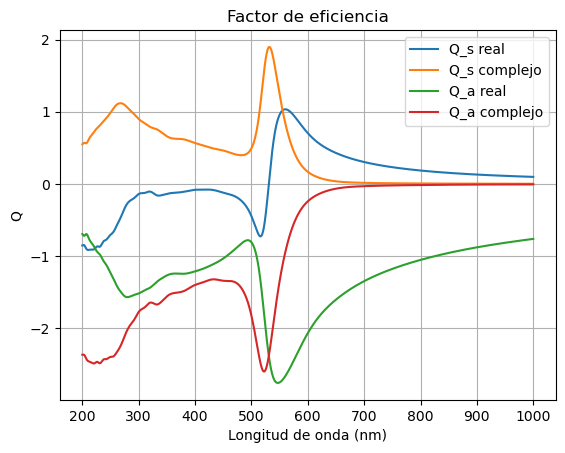

In [48]:
from scipy.interpolate import InterpolatedUnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
"""Se empiez con la obtencion de datos de la función dielectrica del oro
para lo cuál se exportan los datos del documento de Jhonson sobre el 
indicede refracción n y el coeficiente de extinción k de forma que 
epsilon(x) {x-->Longitud de onda 'labda'} es iguala n(x)+ik(x)"""
#Exportamos el documento de una carpeta llamada función y ubicada en el escritorio
# y lo guardamos en un 'data frame'
data_frame = pd.read_csv("Jhonson.csv")

#Se dividen en arreglos cada columna
x = data_frame['long_onda']                    #(Ya son listas que dependen de X)
n = data_frame['n']
k = data_frame['k']

#Realizamos una interpolación de los datos para tener un contínuo
f_interp1 = InterpolatedUnivariateSpline(x, n, k=3)  #Interpolación de n
f_interp2 = InterpolatedUnivariateSpline(x, k, k=3)  #Interpolación de k

#Opcional--Grafícar dichas interpolaciónas para revisar que sean adecuadas
n_interp = lambda x1: f_interp1(x1)
k_interp = lambda x1: f_interp2(x1) 

##Definimos el indice de refracicón complejo para el oro
n_Au = lambda x1: n_interp(x1)+1j*k_interp(x1)

"""Ahora que contamos con el indice de refracción y extincion del oro
podemos escribir su función dielectrica:"""
E_real = lambda x1: (n_interp(x1))**2+(k_interp(x1))**2
E_complejo = lambda x1 :2*n_interp(x1)*k_interp(x1)
E_Au = lambda x1:  E_real(x1)+1j*E_complejo(x1)

n_a= 1.3325               #Indice de refracción del agua
E_a = np.sqrt(n_a)

m = lambda x1: n_Au(x1)/n_a 
t = lambda r,x1: 2*np.pi*n_a*r/x1


Q_sca = lambda r,x1: (8/3)*(t(r,x1))**2*((m(x1)**2-1)/(m(x1)**2+2))**2 
Q_abs = lambda r,x1: -4*t(r,x1)*(((m(x1)**2-1)/(m(x1)**2+2)))

x2 = np.linspace(200,1000,2000)
plt.plot(x2,Q_sca(20,x2).real, label = 'Q_s real')
plt.plot(x2,Q_sca(20,x2).imag, label = 'Q_s complejo')
plt.plot(x2,Q_abs(20,x2).real, label = 'Q_a real')
plt.plot(x2,Q_abs(20,x2).imag, label = 'Q_a complejo')
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Q")
plt.legend(loc = 1)
plt.grid()
plt.title("Factor de eficiencia")

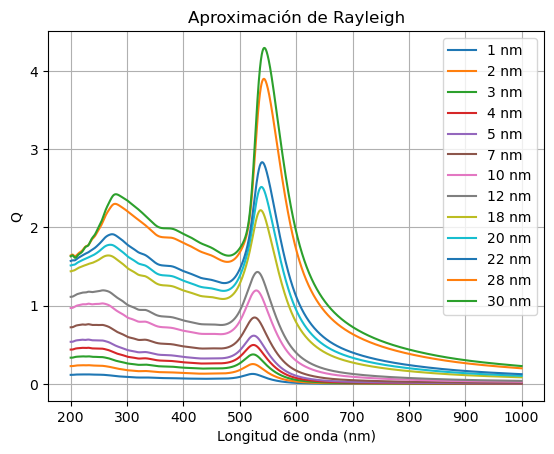

In [49]:
from scipy.interpolate import InterpolatedUnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
"""Se empiez con la obtencion de datos de la función dielectrica del oro
para lo cuál se exportan los datos del documento de Jhonson sobre el 
indicede refracción n y el coeficiente de extinción k de forma que 
epsilon(x) {x-->Longitud de onda 'labda'} es iguala n(x)+ik(x)"""
#Exportamos el documento de una carpeta llamada función y ubicada en el escritorio
# y lo guardamos en un 'data frame'
data_frame = pd.read_csv("Jhonson.csv")

#Se dividen en arreglos cada columna
x = data_frame['long_onda']                    #(Ya son listas que dependen de X)
n = data_frame['n']
k = data_frame['k']

#Realizamos una interpolación de los datos para tener un contínuo
f_interp1 = InterpolatedUnivariateSpline(x, n, k=3)  #Interpolación de n
f_interp2 = InterpolatedUnivariateSpline(x, k, k=3)  #Interpolación de k

#Opcional--Grafícar dichas interpolaciónas para revisar que sean adecuadas
n_interp = lambda x1: f_interp1(x1)
k_interp = lambda x1: f_interp2(x1) 

##Definimos el indice de refracicón complejo para el oro
n_Au = lambda x1: n_interp(x1)+1j*k_interp(x1)

"""Ahora que contamos con el indice de refracción y extincion del oro
podemos escribir su función dielectrica:"""
E_real = lambda x1: (n_interp(x1))**2+(k_interp(x1))**2
E_complejo = lambda x1 :2*n_interp(x1)*k_interp(x1)
E_Au = lambda x1:  E_real(x1)+1j*E_complejo(x1)

n_a= 1.3325               #Indice de refracción del agua
E_a = np.sqrt(n_a)

m = lambda x1: n_Au(x1)/n_a 
t = lambda r,x1: 2*np.pi*n_a*r/x1


Q_sca = lambda r,x1: (8/3)*(t(r,x1))**2*((m(x1)**2-1)/(m(x1)**2+2))**2 
Q_abs = lambda r,x1: -4*t(r,x1)*(((m(x1)**2-1)/(m(x1)**2+2)))

x2 = np.linspace(200,1000,2000)
"""plt.plot(x2,Q_sca(20,x2).real, label = 's_real')
plt.plot(x2,Q_sca(20,x2).imag, label = 's_complejo')
plt.plot(x2,Q_abs(20,x2).real, label = 'a_real')
plt.plot(x2,Q_abs(20,x2).imag, label = 'a_complejo')"""

Q_ext = lambda r,x2: Q_sca(r,x2).real - Q_abs(r,x2).imag
lista = [1,2,3,4,5,7,10,12,18,20,22,28,30]

for i in lista:
    plt.plot(x2,Q_ext(i,x2),label = str(i) + " nm")
    plt.xlabel("Longitud de onda (nm)")
    plt.ylabel("Q")
    plt.legend(loc = 1)
    plt.grid()
    plt.title("Aproximación de Rayleigh")

Agregando este factor al modelo simiempirico

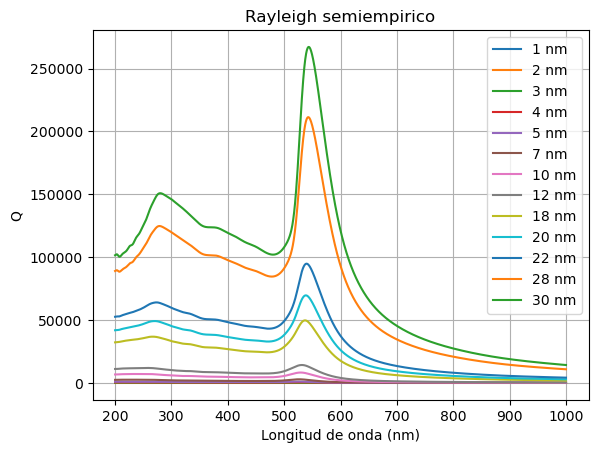

In [50]:
Q_sca = lambda r,x1: (8/3)*(t(r,x1))**2*((m(x1)**2-1)/(m(x1)**2+2))**2 
Q_abs = lambda r,x1: -4*t(r,x1)*(((m(x1)**2-1)/(m(x1)**2+2)))

x2 = np.linspace(200,1000,2000)
"""plt.plot(x2,Q_sca(20,x2).real, label = 's_real')
plt.plot(x2,Q_sca(20,x2).imag, label = 's_complejo')
plt.plot(x2,Q_abs(20,x2).real, label = 'a_real')
plt.plot(x2,Q_abs(20,x2).imag, label = 'a_complejo')"""

Q_ext = lambda r,x2: Q_sca(r,x2).real - Q_abs(r,x2).imag
lista = [1,2,3,4,5,7,10,12,18,20,22,28,30]
Abs = lambda r,x2: (np.pi*r**2*(Q_ext(r,x2))*do*concentracion)/2.303

lista = [1,2,3,4,5,7,10,12,18,20,22,28,30]

for i in lista:
    plt.plot(x2,Abs(i,x2),label = str(i) + " nm") 
    plt.xlabel("Longitud de onda (nm)")
    plt.ylabel("Q")
    plt.legend(loc = 1)
    plt.grid()
    plt.title("Rayleigh semiempirico")

Observamos que para radios grandes no es tan cercana a la forma esperada del plasmón producido por partículas de oro

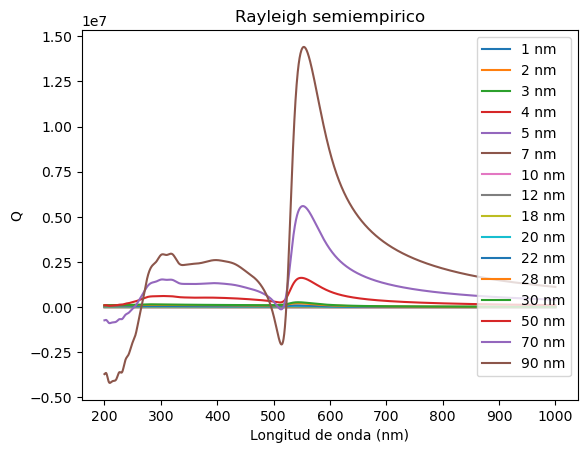

In [51]:
Q_sca = lambda r,x1: (8/3)*(t(r,x1))**2*((m(x1)**2-1)/(m(x1)**2+2))**2 
Q_abs = lambda r,x1: -4*t(r,x1)*(((m(x1)**2-1)/(m(x1)**2+2)))

x2 = np.linspace(200,1000,2000)

Q_ext = lambda r,x2: Q_sca(r,x2).real - Q_abs(r,x2).imag
lista = [1,2,3,4,5,7,10,12,18,20,22,28,30,50,70,90]
Abs = lambda r,x2: (np.pi*r**2*(Q_ext(r,x2))*do*concentracion)/2.303

for i in lista:
    plt.plot(x2,Abs(i,x2),label = str(i) + " nm") 
    plt.xlabel("Longitud de onda (nm)")
    plt.ylabel("Q")
    plt.legend(loc = 1)
    plt.grid()
    plt.title("Rayleigh semiempirico")

Debido a que no hya una forma facil de realizar una comparación de estos datos con python, sse procedió a guardar los datos en listas en archivos csv, tanto para la solución de Mie como para la de Rayleigh agregando a cada programa el bloque de codigo que se encuentra a continuación.

In [52]:
"""Guardamos los datos en una lista para su manipulación

data1 = []       #1 nm
data2 = []      #2 nm
data3 = []     #3 nm
data4 = []     #5 nm
data5 = []      #8 nm
data6 = []      #10 nm
data7 = []      #12 nm
data8 = []      #15 nm
data9 = []       #20 nm
data10 = []       #25 nm
data11 = []      #30 nm
data12 = []       #50 nm

x3=[]

for i in range (200,1000):
    x3.insert(i,i)
    data1.insert(i,Q_ext(1,i))
    data2.insert(i,Q_ext(2,i))
    data3.insert(i,Q_ext(3,i))
    data4.insert(i,Q_ext(5,i))
    data5.insert(i,Q_ext(8,i))
    data6.insert(i,Q_ext(10,i))
    data7.insert(i,Q_ext(12,i))
    data8.insert(i,Q_ext(15,i))
    data9.insert(i,Q_ext(20,i))
    data10.insert(i,Q_ext(25,i))
    data11.insert(i,Q_ext(30,i))
    data12.insert(i,Q_ext(50,i))


dict = {'longitud de onda': x3,'1 nm': data1,'2 nm': data2, '3 nm': data3,'5 nm': data4,
        '8 nm': data5, '10 nm': data6,'12 nm': data7,'15 nm':data8, '20 nm':data9,
        '25 nm': data10,'30 nm':data11, '50 nm':data12}
df = pd.DataFrame(dict) 
df.to_csv('Data_Ray.csv')
"""

"Guardamos los datos en una lista para su manipulación\n\ndata1 = []       #1 nm\ndata2 = []      #2 nm\ndata3 = []     #3 nm\ndata4 = []     #5 nm\ndata5 = []      #8 nm\ndata6 = []      #10 nm\ndata7 = []      #12 nm\ndata8 = []      #15 nm\ndata9 = []       #20 nm\ndata10 = []       #25 nm\ndata11 = []      #30 nm\ndata12 = []       #50 nm\n\nx3=[]\n\nfor i in range (200,1000):\n    x3.insert(i,i)\n    data1.insert(i,Q_ext(1,i))\n    data2.insert(i,Q_ext(2,i))\n    data3.insert(i,Q_ext(3,i))\n    data4.insert(i,Q_ext(5,i))\n    data5.insert(i,Q_ext(8,i))\n    data6.insert(i,Q_ext(10,i))\n    data7.insert(i,Q_ext(12,i))\n    data8.insert(i,Q_ext(15,i))\n    data9.insert(i,Q_ext(20,i))\n    data10.insert(i,Q_ext(25,i))\n    data11.insert(i,Q_ext(30,i))\n    data12.insert(i,Q_ext(50,i))\n\n\ndict = {'longitud de onda': x3,'1 nm': data1,'2 nm': data2, '3 nm': data3,'5 nm': data4,\n        '8 nm': data5, '10 nm': data6,'12 nm': data7,'15 nm':data8, '20 nm':data9,\n        '25 nm': data10

De esta forma podemos exportar los datos a un programa mas cómodo para la manipulación de tablas de datos,como lo es *origin* y realizar una comparación entre ambas soluciones para radios especificos.

## **1 nm**
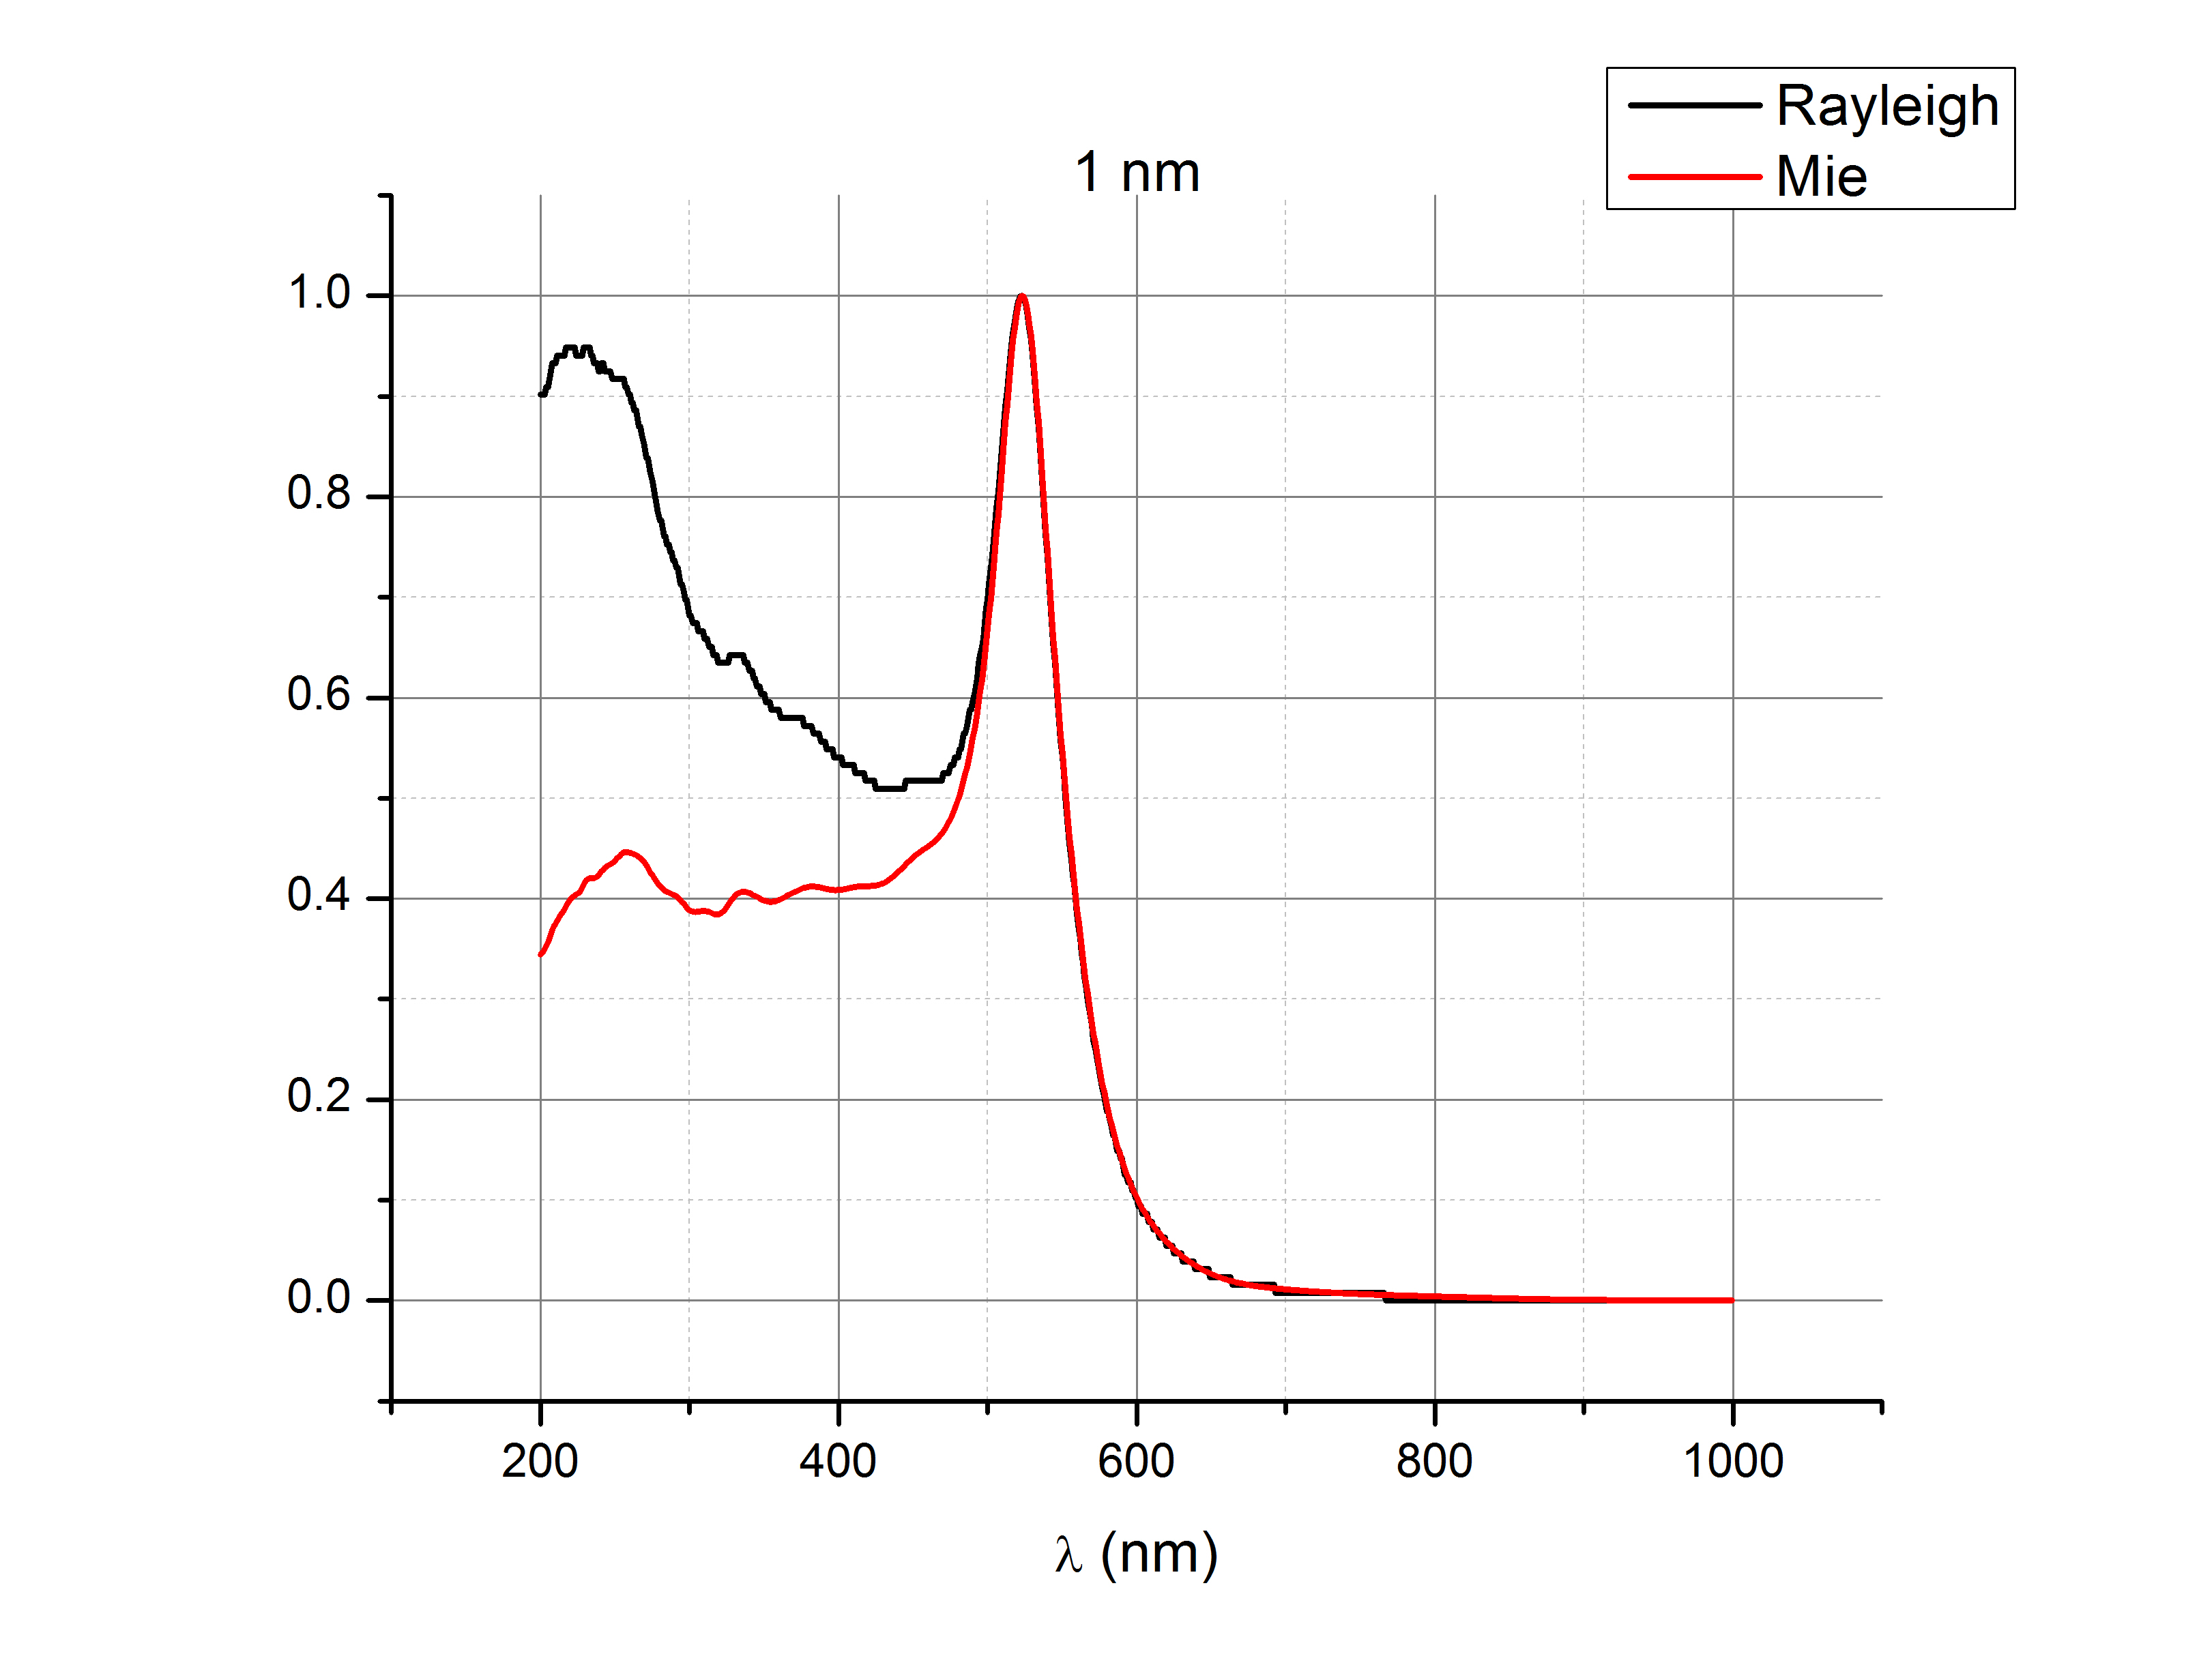
## **5 nm**
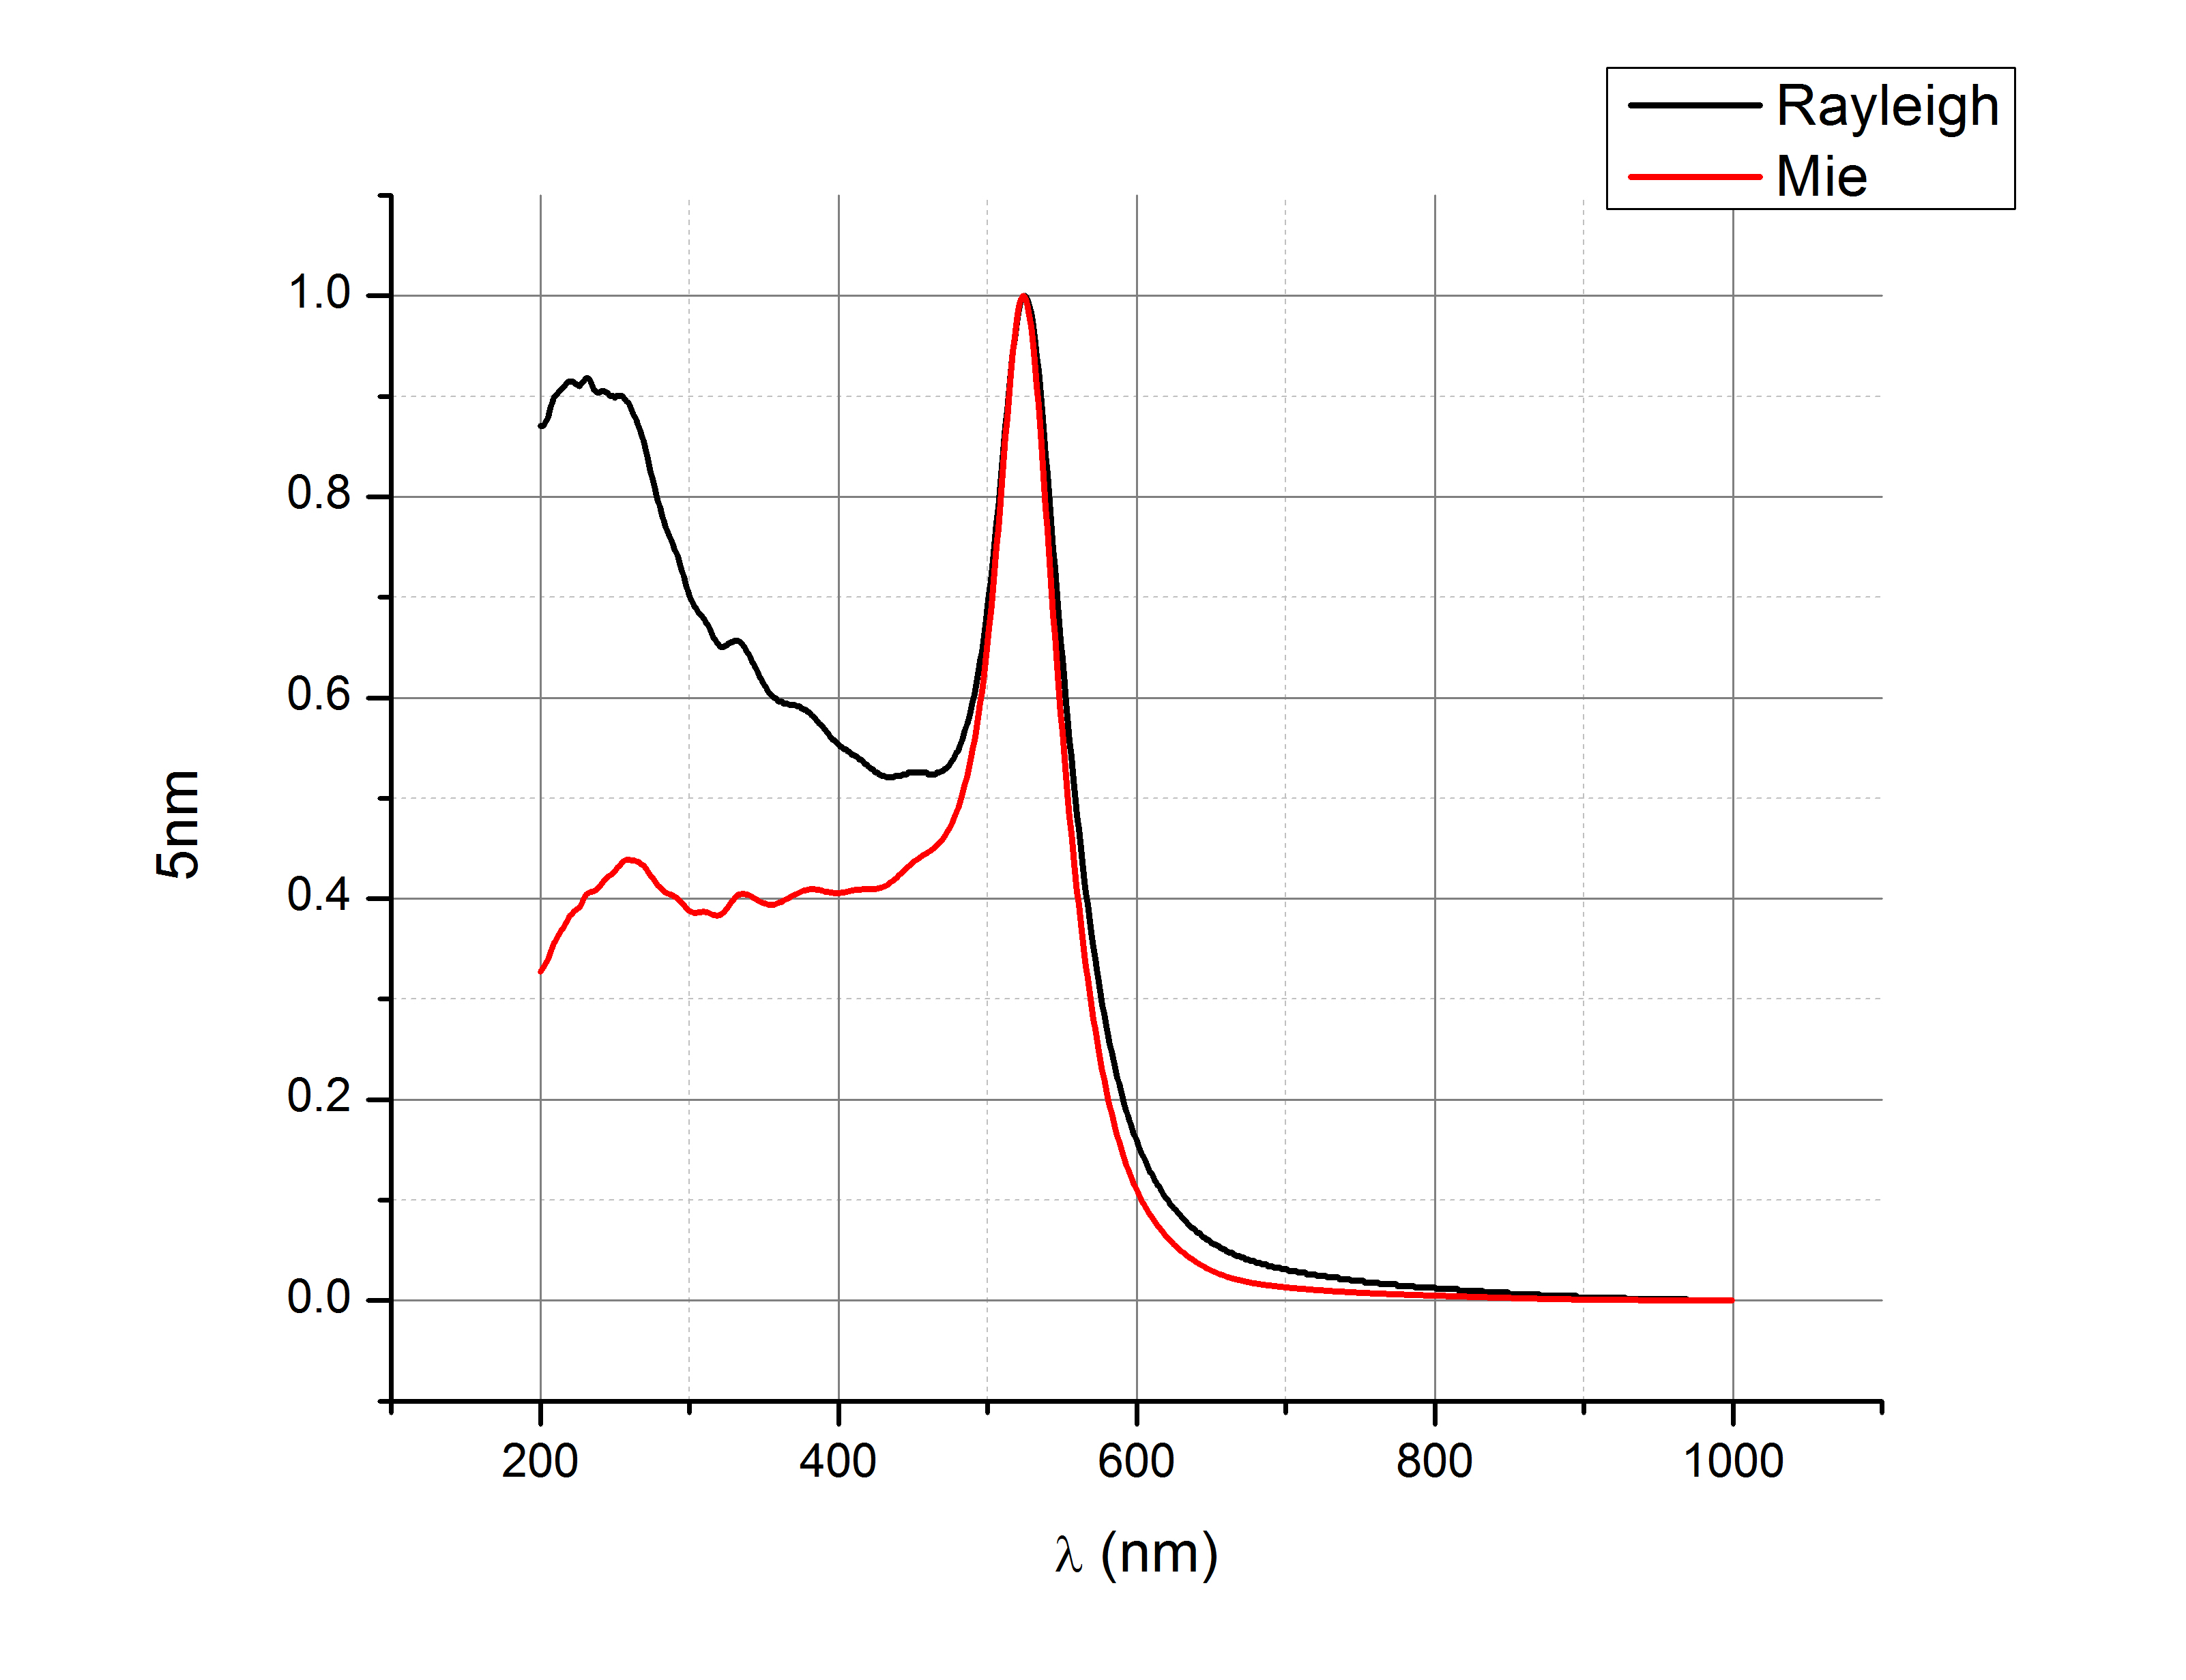
## **20 nm**
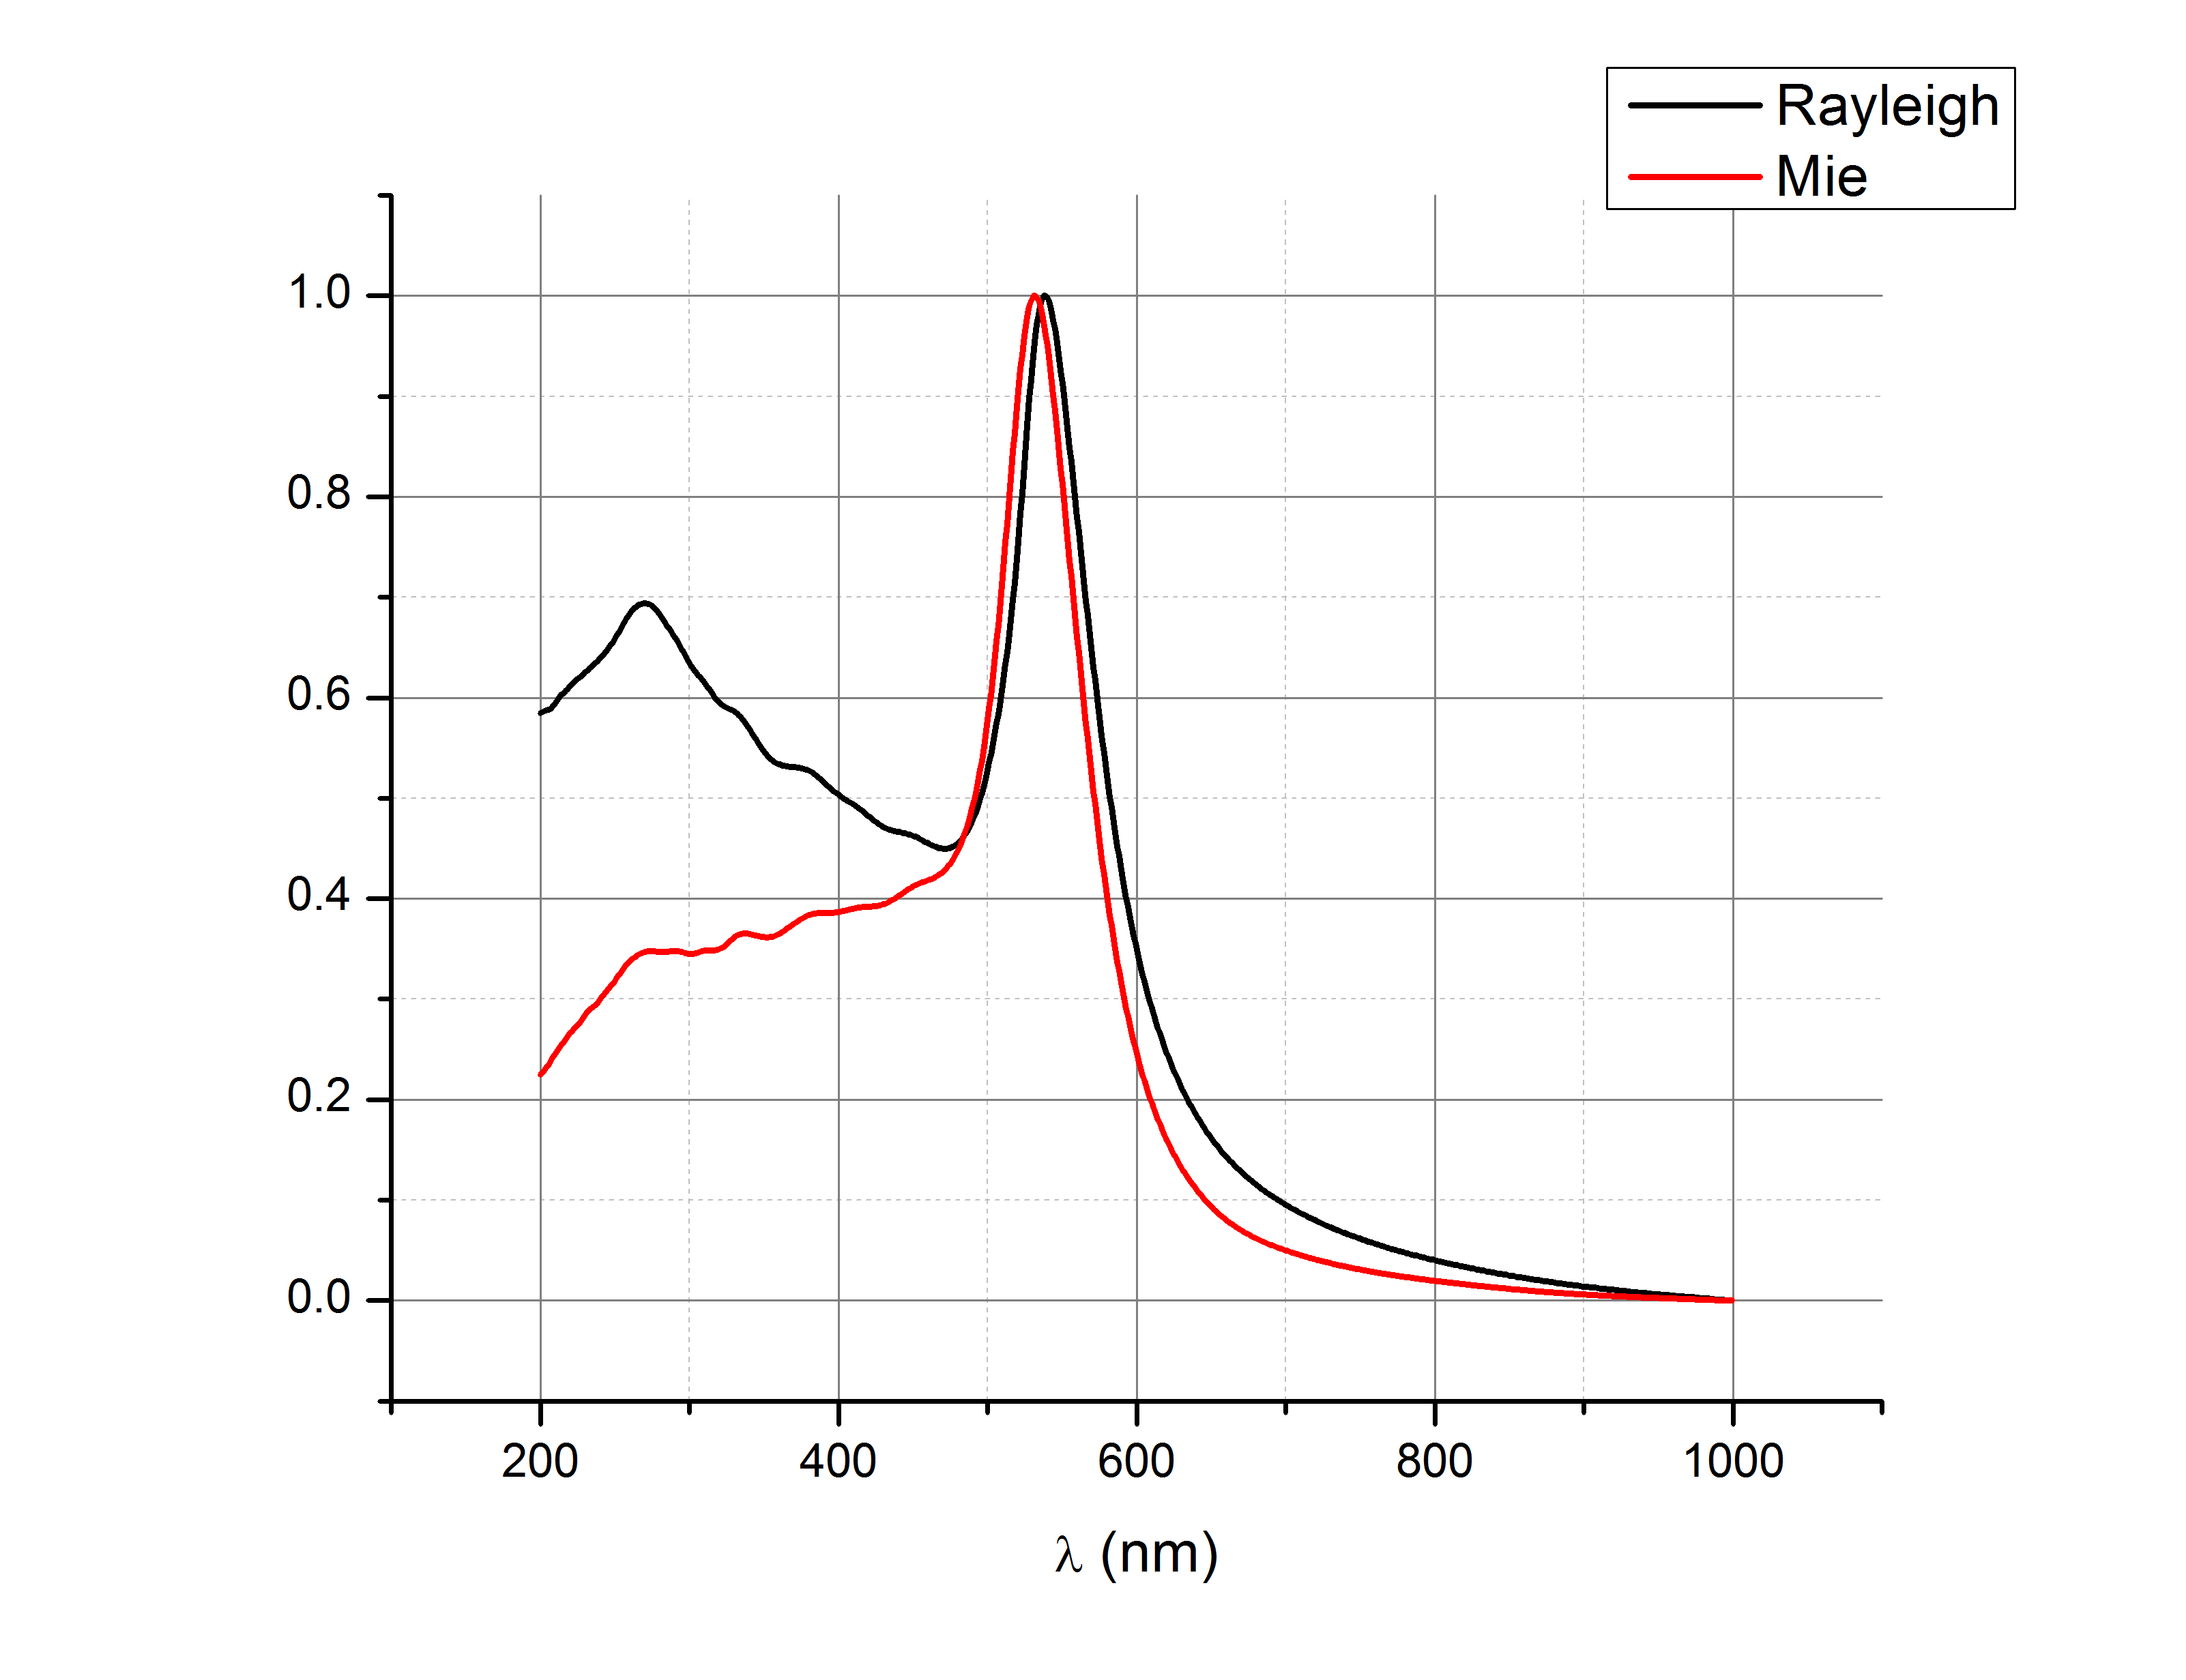
## **50 nm**
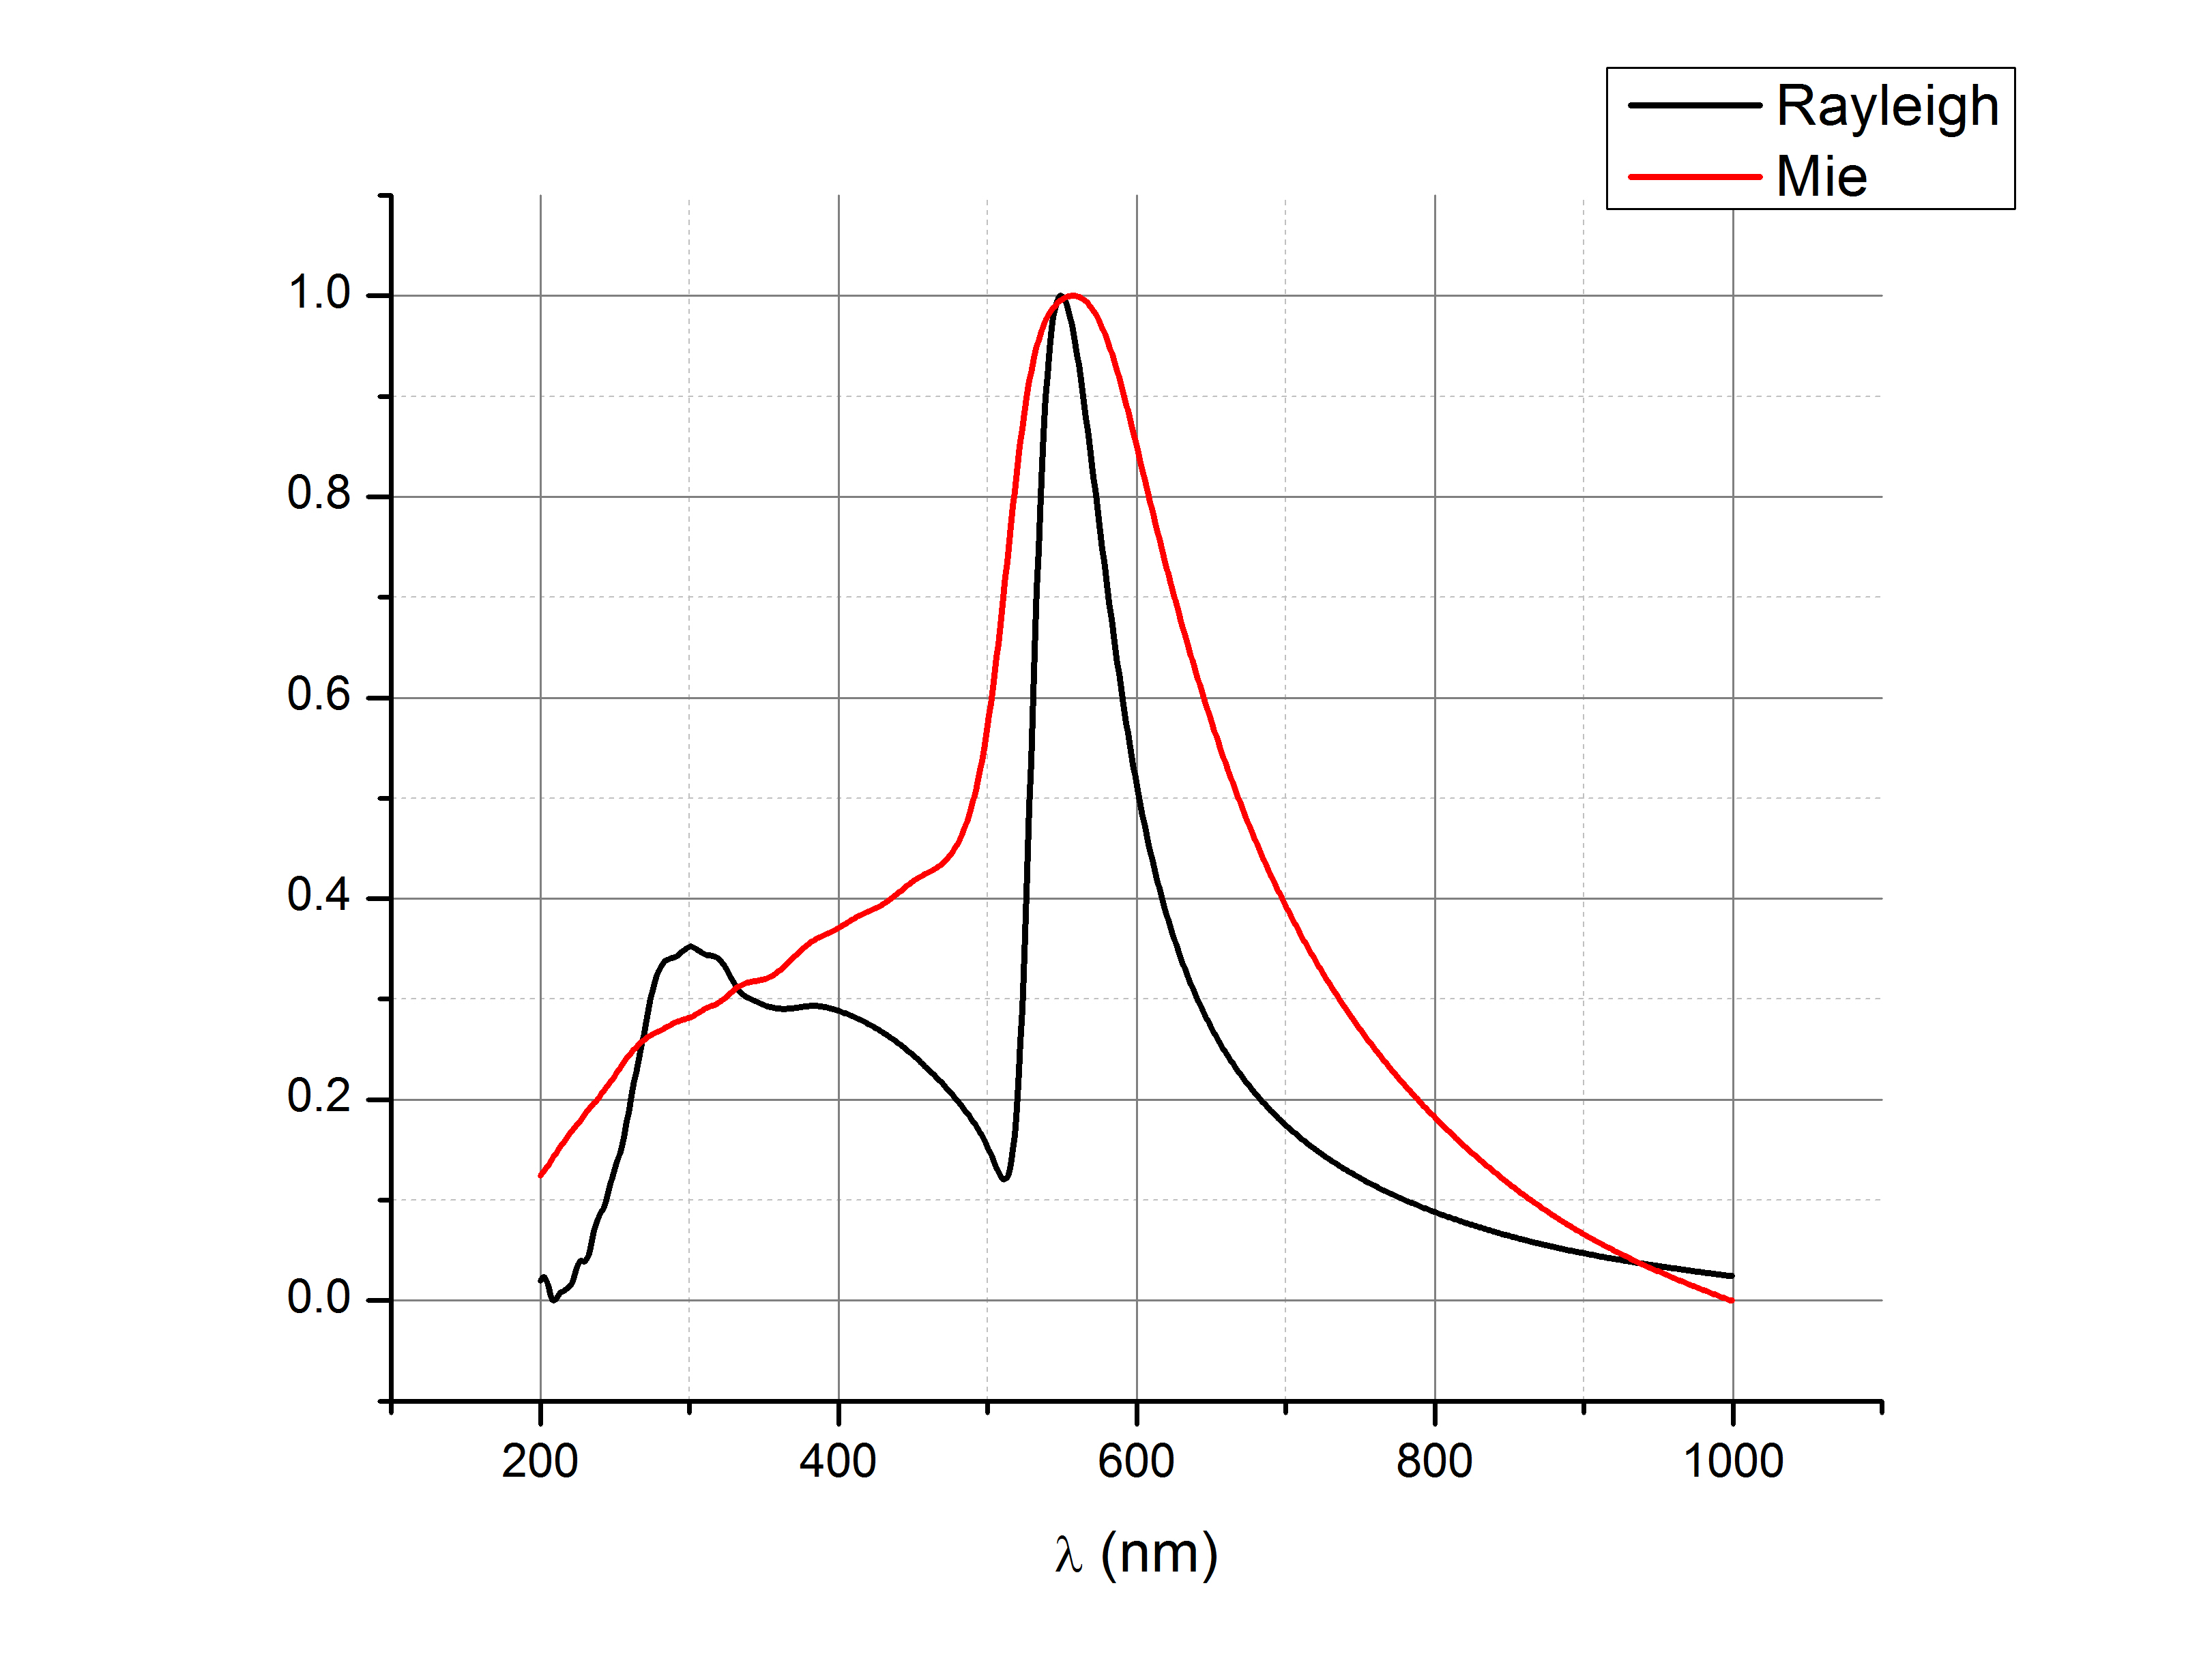


En cuanto a la relación entre longitud de onda y pico de resonancia de plasmón obtenido por ambos programas resulta en la siguiente gráfica:

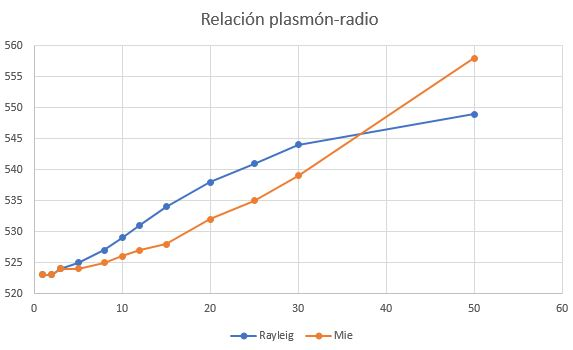

Al no coincidir con los datos teóricos de *Wolfgang-Nguyen* que se muestran a continuación, podriamos 'estimar' el tamaño de la partícula en función del plasmón obtenido a partir de una interpolación de dichos datos.
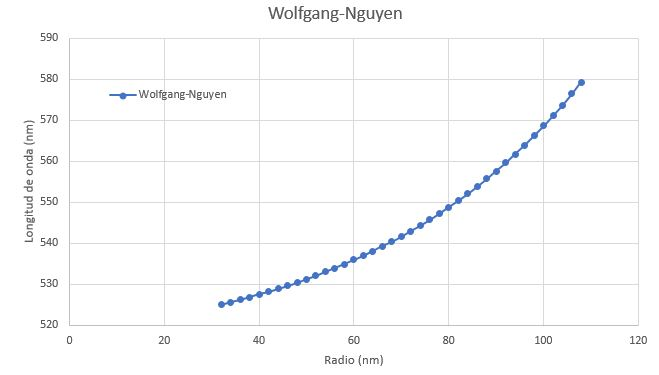
